# Lenders Club Case Study


## Load the data in a dataframe and perform basic analysis
- We will first load the data from csv in a dataframe
- Then we will do some basic checks on the data such as the number of rows & columns, data types etc.

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load data in the data frame named LC - short for Lenders Club
LC = pd.read_csv("loan.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_14884\868709825.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  LC = pd.read_csv("loan.csv")


In [4]:
# Check the number of rows and columns in the data frame
LC.shape

(39717, 111)

## Some basic details about the data are as below
- Number of Rows : 39717
- Number of Columns : 111

In [8]:
# Lets check the data type of the columns
LC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [768]:
LC.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [767]:
LC.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

## Missing values analysis
- Analyze the missing/ null values and perform appropriate handling 
- One possible handling may be to drop the rows or columns
- Other possible handling may be to impute the values using different methods
- Finally we do some sanity checks on the data

In [75]:
## Lets check the percentage of null values across the columns
round(100*LC.isnull().mean(),2).reset_index()

index      0
0                            id    0.0
1                     member_id    0.0
2                     loan_amnt    0.0
3                   funded_amnt    0.0
4               funded_amnt_inv    0.0
..                          ...    ...
106                   tax_liens    0.1
107             tot_hi_cred_lim  100.0
108           total_bal_ex_mort  100.0
109              total_bc_limit  100.0
110  total_il_high_credit_limit  100.0

[111 rows x 2 columns]

In [79]:
#We see that a significant number of columns have a high percentage of null values
# Lets get the list of columns that have more than 75% null values
null_cols = list(filter(lambda x: round(100*LC[x].isnull().mean(),2) > 75, LC.columns))
null_cols

['mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percen

In [81]:
#Now that we have the list of cols with more than 75% null values - these columns do not help us in the analysis of the data
# They may mis lead the analysis, therefore we drop these columns to get a clean dataframe LCC
LCC = LC.drop(null_cols, axis=1)

In [85]:
## Lets check the shape of the clean datframe LCC
LCC.shape

(39717, 55)

In [88]:
#Lets check again the % of null values in the remaining columns
round(100*LCC.isnull().mean(),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.59
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

### Analysis on the columns 
- we see that desc column has 32.59% null values, this is ok as description may be null in some cases
- mths_since_last_delinq has almost 65% null values - we will retain this column, but it may not be much useful for the analysis

In [104]:
# Lets identify columns which may not be useful for our analysis based on business logic
 #url and desc are for sure of no use
print(len(LCC.title.unique()))
print(len(LCC.purpose.unique()))
print(len(LCC.emp_title.unique()))
print(len(LCC.zip_code.unique()))
print(len(LCC.addr_state.unique()))

19616
14
28821
823
50


In [106]:
#As we see , title, emp_title, zip_code have too many unique values - 
# these many unique values for categorical variable does not make sense for EDA
extra_cols = ['url','desc','title','emp_title','zip_code'] 

In [107]:
# Lets drop the extra columns
LCC = LCC.drop(extra_cols, axis=1)

In [109]:
#Lets check again the % of null values in the remaining columns
round(100*LCC.isnull().mean(),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
purpose                        0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths                 0.00
mths_since_last_delinq        64.66
open_acc                       0.00
pub_rec                        0.00
revol_bal                      0.00
revol_util                  

In [130]:
# emp_length has 2.71 % null values, lets assess this column
LCC.emp_length.unique()
LCC["emp_length"].dtypes
#We replace the < 1 year to be 0
LCC['emp_length'] = LCC["emp_length"].apply(lambda x: '0' if x == '< 1 year' else('NA' if x is np.nan else x.replace(' years','')))

In [131]:
LCC.emp_length.unique()

array(['10+', '0', '1 year', '3', '8', '9', '4', '5', '6', '2', '7', 'NA'],
      dtype=object)

In [132]:
LCC['emp_length'] = LCC["emp_length"].apply(lambda x: x.replace(' year',''))
LCC['emp_length'] = LCC["emp_length"].apply(lambda x: x.replace('+',''))

In [138]:
# Get the median of emp_length excluding NA values
LCC[LCC["emp_length"] != 'NA']['emp_length'].median()

4.0

In [140]:
# As 2.7% are NA, we replace them with median value
LCC['emp_length'] = LCC["emp_length"].apply(lambda x: '4' if x == 'NA' else x)

In [142]:
# Change the type of emp_length to int
LCC.emp_length = LCC.emp_length.astype('int32') 

In [143]:
#Lets check again the % of null values in the remaining columns
round(100*LCC.isnull().mean(),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_length                     0.00
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
purpose                        0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths                 0.00
mths_since_last_delinq        64.66
open_acc                       0.00
pub_rec                        0.00
revol_bal                      0.00
revol_util                  

- only the mths_since_last_delinq column is with high number of null values , but we retain it because in business terms it is relvant only for the delinquent cases

In [145]:
# Lets check if the data types of the columns are correct
LCC.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_length                      int32
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
mths_since_last_delinq        float64
open_acc                        int64
pub_rec                         int64
revol_bal   

In [146]:
# term, int_rate and revol_util are numberic columns stored as string, lets convert them
LCC['term']=LCC['term'].apply(lambda x: int(x.replace(' months','')))

In [148]:
LCC['int_rate']=LCC['int_rate'].apply(lambda x: float(x.replace('%','')))

In [150]:
LCC['revol_util']=LCC['revol_util'].apply(lambda x: 'NA' if x is np.nan else x.replace('%',''))

In [155]:
revol_util_median = LCC[LCC['revol_util'] != 'NA'].revol_util.astype('float').median()

In [156]:
# There are only 0.13 % null values in revol_util - we replace them with the median
LCC['revol_util']=LCC['revol_util'].apply(lambda x: revol_util_median if x == 'NA' else float(x))

In [159]:
# chargeoff_within_12_mths has only 0 and NA values - dropping this column
LCC = LCC.drop('chargeoff_within_12_mths', axis=1)

In [162]:
LCC.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [163]:
# replace null values with the mode value for pub_rec_bankruptcies
LCC.pub_rec_bankruptcies = LCC.pub_rec_bankruptcies.fillna(0)

In [164]:
LCC.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    38036
1.0     1674
2.0        7
Name: count, dtype: int64

In [165]:
LCC.tax_liens.unique()
# Drop the column tax_liens as it does not give any info
LCC = LCC.drop('tax_liens', axis=1)

array([ 0., nan])

In [ ]:
# Drop the column tax_liens as it does not give any info
LCC = LCC.drop('tax_liens', axis=1)

In [194]:
print(LCC[LCC['mths_since_last_delinq'].isnull() == False].mode()['mths_since_last_delinq'][0])
print(LCC[LCC['collections_12_mths_ex_med'].isnull() == False].mode()['collections_12_mths_ex_med'][0])

0.0
0.0


In [195]:
# 0.0 is the most repeated value, so we replace nulls with 0.0
LCC.mths_since_last_delinq = LCC.mths_since_last_delinq.fillna(0.0)
LCC.collections_12_mths_ex_med = LCC.collections_12_mths_ex_med.fillna(0.0)

In [200]:
# policy_code, appication_type, acc_now_delinq, delinq_amnt, pymnt_plan, initial_list_status, collections_12_mths_ex_med has same values across all rows
# these accounts wont help in the data analysis in any way, therefore we drop these columns
LCC = LCC.drop(['policy_code','application_type','acc_now_delinq','delinq_amnt','pymnt_plan','initial_list_status','collections_12_mths_ex_med'], axis=1)

In [211]:
# dropping column pymnt_plan as it has all same values
LCC = LCC.drop('collections_12_mths_ex_med',axis=1)

In [212]:
LCC.shape

(39717, 41)

In [213]:
round(100*LCC.isnull().mean(),2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 0.00
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
mths_since_last_delinq     0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.00
total_acc                  0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_pymnt                0.00
total_py

- we now have only two date fields with null value, we will keep them as is and proceed to next steps

## Univariate analysis
- Our target variable is the loan_status - as we need to identify what are the factors leading to a "Charged Off" loan status
- We need to first clasify our variables/columns as numerical and categorical variables
- After this we perform univariate analysis on some key variables to identify their distribution
- Then we will proceed to segmented univariate analysis

In [300]:
LCC.nunique()

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
purpose                       14
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc                     82
out_prncp                   1137
out_prncp_inv               1138
total_pymn

In [339]:
# Lets create two lists num_cols and cat_cols for numerical and categorical columns respectively
num_cols = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymt','total_pymt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymt_amnt','pub_rec','pub_rec_bankruptcies']
cat_cols = ['emp_length','term','grade','sub_grade','home_ownership','verification_status','loan_status','purpose','addr_state']
extra_cols = ['id','member_id','last_pymnt_d','last_credit_pull_d']
#Though term is an int column, it has only two possible values and therefore included as a categorical column
#Some columns though integer values, have less unique values and thus considered as categorical

## Numerical variables univariate analysis

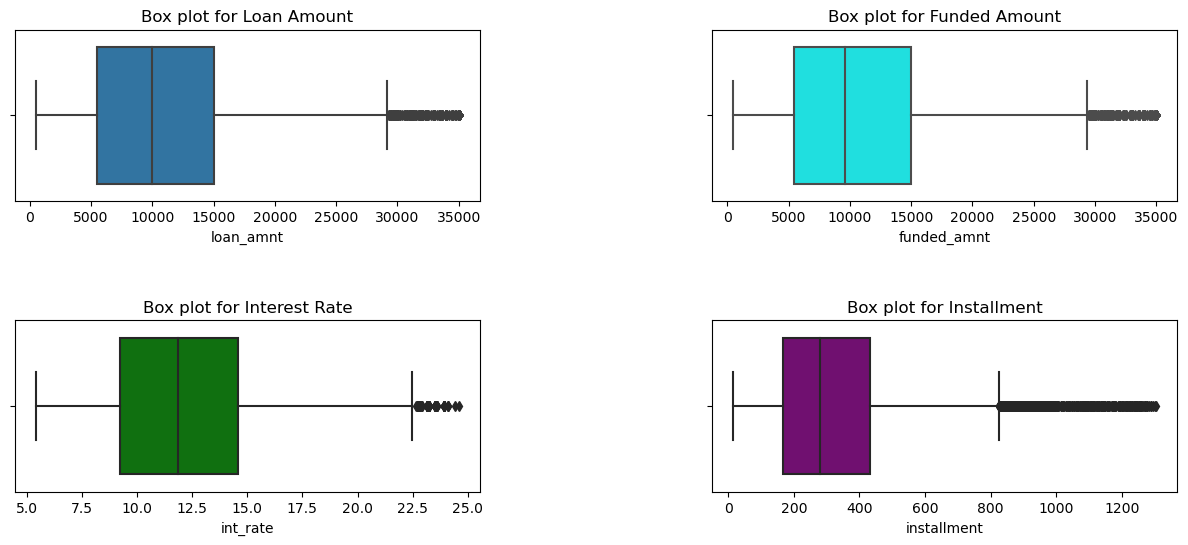

In [286]:
#Lets start plotting the box plots for some key numberical columns, so that we can check the fences and outliers
# loan_amnt, funded_amnt, int_rate, installment, emp_length, annual_inc 
fig, ax = plt.subplots(ncols=2, nrows=2, gridspec_kw={'hspace': 0.7, 'wspace': 0.5})
fig.set_size_inches(15,6)
sns.boxplot(ax=ax[0,0],x=LCC.loan_amnt).set_title('Box plot for Loan Amount')
sns.boxplot(ax=ax[0,1],x=LCC.funded_amnt, color='Cyan').set_title('Box plot for Funded Amount')
sns.boxplot(ax=ax[1,0],x=LCC.int_rate, color='Green').set_title('Box plot for Interest Rate')
sns.boxplot(ax=ax[1,1],x=LCC.installment, color='Purple').set_title('Box plot for Installment')
plt.show()

In [255]:
LCC.int_rate.describe()
LCC.installment.describe()

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

## Analysis from the box plots
- more than 50% of the loan amounts lie in th range of 5000 to 15000 dollars
- loan amount and funded amount have the same statistics - therefore it does not see necessary to consider them separately
- more than 50% of the loans have an interest rates ranging between 9% to 14%
- more than 50% of the installments are lying in the range of around 170 to 425
- installments does have a good number of outliers above 1000 dollars

Text(0.5, 1.0, 'Box plot for Annual Inc')

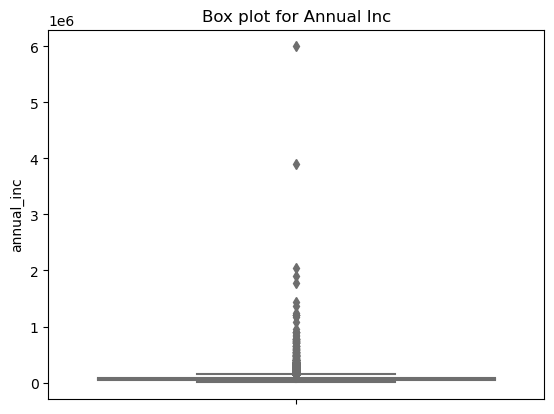

In [252]:
#Lets plot the annual_inc as an independent plot
sns.boxplot(y=LCC.annual_inc, color='Violet').set_title('Box plot for Annual Inc')

- here we see that there are many outliers i.e. cases with very high annual income , so lets restrict the data up to a certain value of annual income

Text(0.5, 1.0, 'Box plot for Annual Inc')

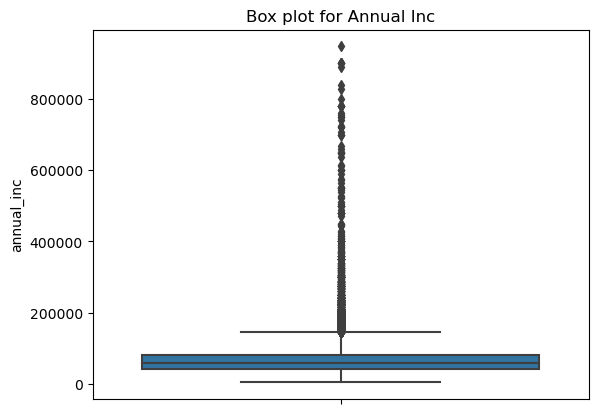

In [785]:
#based on the plot, lets resrict the annual income to 1 million dollars and observe the change in the plot
sns.boxplot(y=LCC[LCC['annual_inc'] < 1000000].annual_inc).set_title('Box plot for Annual Inc')

In [270]:
print("Annual income 3rd quantile: ", LCC[LCC['annual_inc'] < 1000000].annual_inc.quantile(0.03))
print("Annual income 98th quantile: ", LCC[LCC['annual_inc'] < 1000000].annual_inc.quantile(0.98))

Annual income 3rd quantile:  20004.0
Annual income 98th quantile:  185003.84


- here we see that 95% of the values of annual_inc lie between 20000 and 185000 

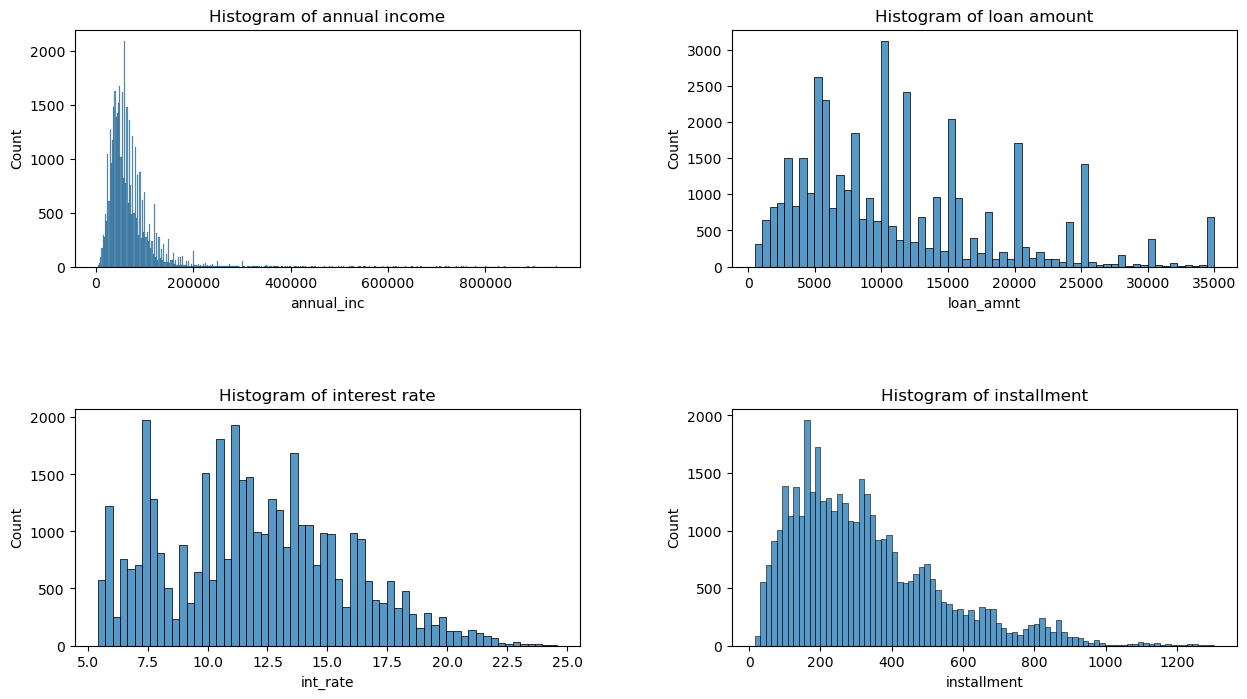

In [291]:
# Lets plot a histogram for the annual income and other numerical variables
fig,ax = plt.subplots(ncols=2, nrows=2, gridspec_kw={'hspace': 0.6, 'wspace': 0.3})
fig.set_size_inches(15,8)
sns.histplot(LCC[LCC['annual_inc'] < 1000000].annual_inc, ax=ax[0,0]).set_title('Histogram of annual income')
sns.histplot(LCC.loan_amnt, ax=ax[0,1]).set_title('Histogram of loan amount')
sns.histplot(LCC.int_rate, ax=ax[1,0]).set_title('Histogram of interest rate')
sns.histplot(LCC.installment, ax=ax[1,1]).set_title('Histogram of installment')
plt.show()

## Observations based on histogram
- For the loan amount we see that there are spikes at exact amounts such as 10k, 15k, 20k, 25k and so on
- There is a high concentration of installment values below 500 dollars
- For the annual income it is mostly inline with the boxplot observations that most of the cases the income is under 200k dollars

<Axes: xlabel='dti'>

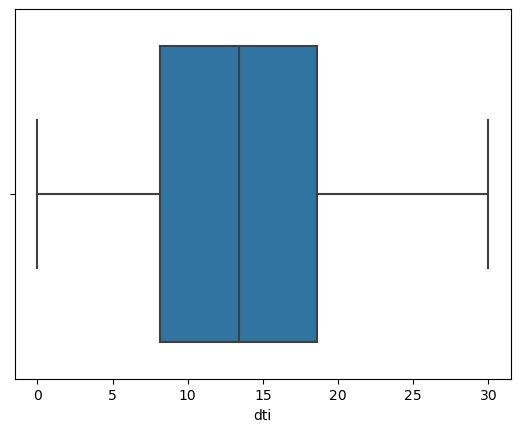

In [292]:
# Lets check if there are any insigths from other numerical variables
sns.boxplot(x=LCC.dti)

In [293]:
LCC.dti.describe()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

In [299]:
print("DTI 15th Quantile: ", LCC.dti.quantile(0.15))
print("DTI 90th Quantile: ", LCC.dti.quantile(0.90))

DTI 15th Quantile:  5.58
DTI 90th Quantile:  22.33


## Observation on DTI
- For the middle 50% of the cases the debt vs monthly income ratio is between 8 to 18%
- more than 70% of the cases lie in the range of 5% to 22%

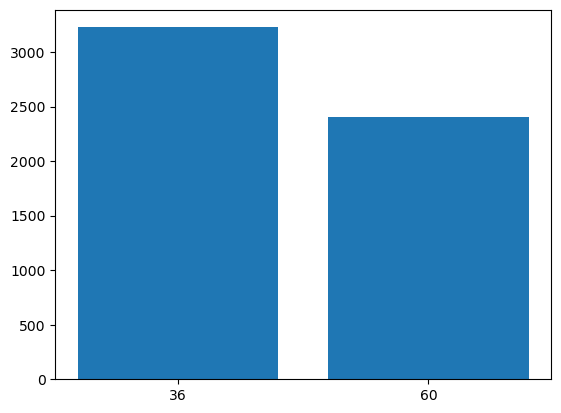

In [667]:
LCC.term=LCC.term.astype('str')
term_charge_off = LCC[LCC['loan_status']=='Charged Off'].groupby('term').size().reset_index(name='count')
plt.bar(x='term',height='count',data=term_charge_off)
plt.show()

## Segmented Univariate analysis on select numerical variables

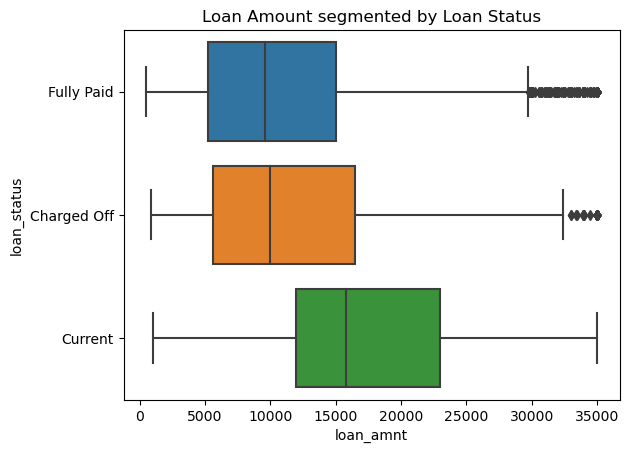

In [786]:
# Based on the plottings above, lets consider the below as our key numerical variables for segmented univariate analysis
# annual_inc, loan_amnt, installment, int_rate and dti
# we will first consider the loan_status itself as a basis of segmentation and plot the boxplots 
sns.boxplot(x=LCC.loan_amnt, y=LCC.loan_status).set_title('Loan Amount segmented by Loan Status')
plt.show()


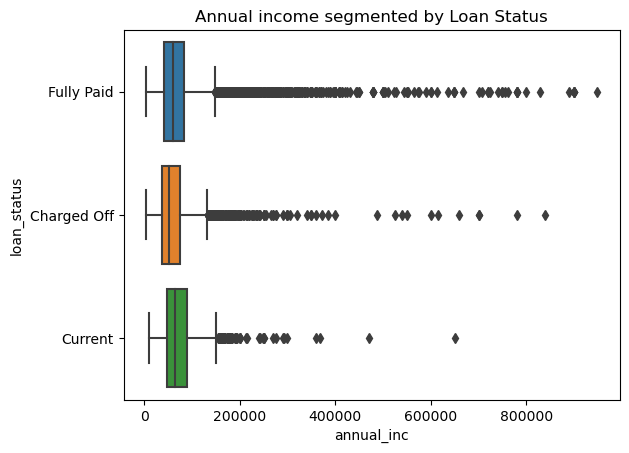

In [787]:
sns.boxplot(x=LCC[LCC['annual_inc'] < 1000000].annual_inc, y=LCC.loan_status).set_title('Annual income segmented by Loan Status')
plt.show()


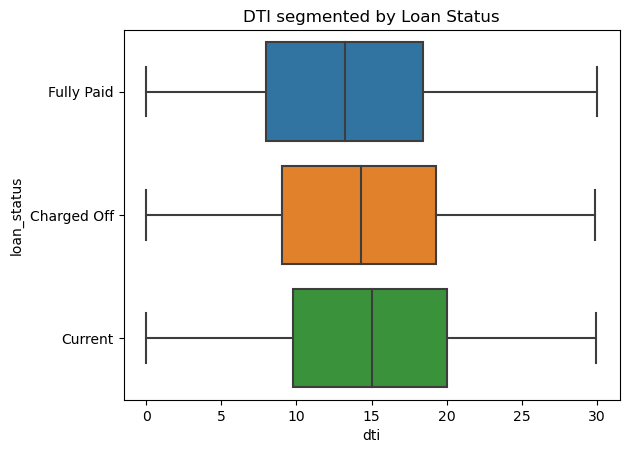

In [788]:
sns.boxplot(x=LCC.dti, y=LCC.loan_status).set_title('DTI segmented by Loan Status')
plt.show()


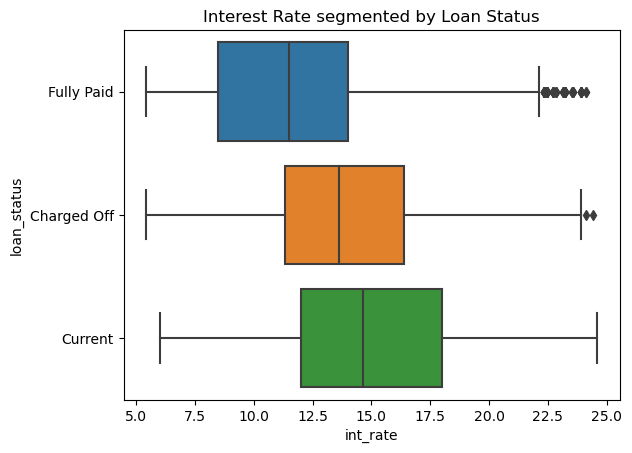

In [789]:
sns.boxplot(x=LCC.int_rate, y=LCC.loan_status).set_title('Interest Rate segmented by Loan Status')
plt.show()

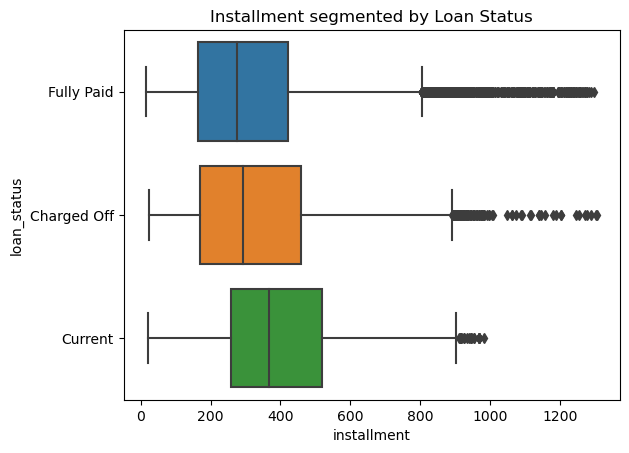

In [790]:
sns.boxplot(x=LCC.installment, y=LCC.loan_status).set_title('Installment segmented by Loan Status')
plt.show()

## Inference from the above plots
- The loans in current status typically have a higher loan amount based on the 25% and 75% quantile
- We can see that the charge offs are higher in the lower income range, as the 75% & 100% of the charged off status is lower than that of current and fully paid loans 
- Those with a lower DTI , seem to have more Fully Paid loans, however there is only a slight variation
- Fully paid loans have a lower interest rate with 75% around ~14%, while the 75% for charged off loans is higher around ~16.5% and for the current loans the 75% of int_rate is even higher at 18%

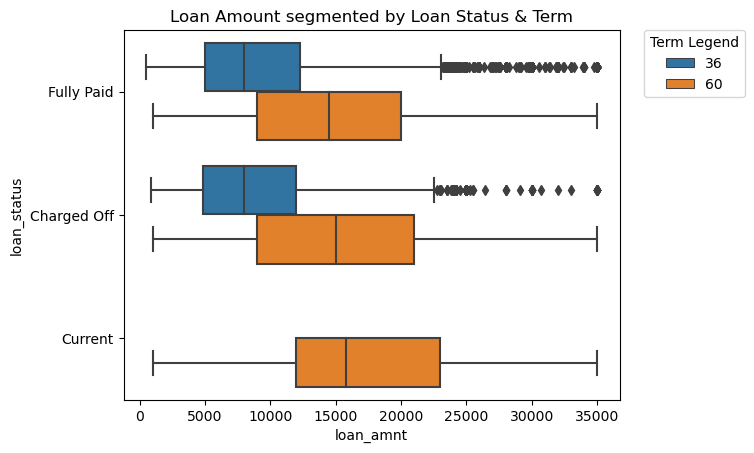

In [770]:
# Lets add the term as a factor on the loan Amount segmented analysis
ax = sns.boxplot(x=LCC.loan_amnt, y=LCC.loan_status, hue=LCC.term).set_title('Loan Amount segmented by Loan Status & Term')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Term Legend')
plt.show()

## Key inferences from above plot
- All current loans have term of 60 months
- The loans with term of 60 months have higher amount both in case of Fully Paid and Charged Off loans

In [332]:
LCC.emp_length.unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

<Axes: xlabel='pub_rec_bankruptcies', ylabel='Count'>

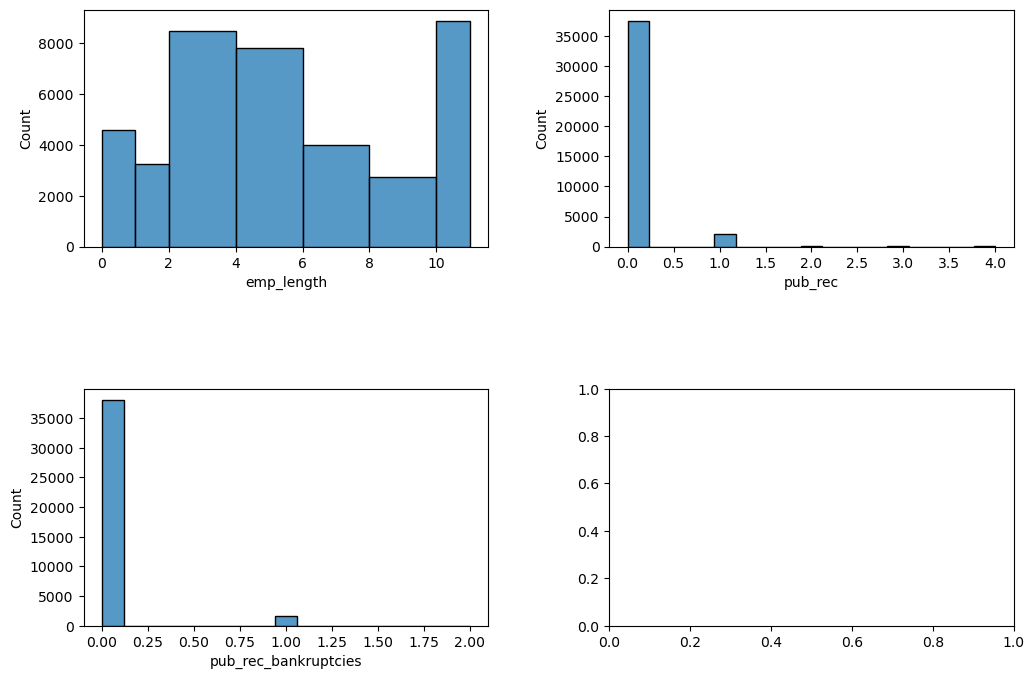

In [335]:
# Histograms for few other numerical variables but with less unique values
fig, ax = plt.subplots(ncols = 2, nrows = 2, gridspec_kw={'hspace': 0.6, 'wspace': 0.3})
fig.set_size_inches(12,8)
sns.histplot(LCC.emp_length, ax=ax[0,0], bins=[0,1,2,4,6,8,10,11])
sns.histplot(LCC.pub_rec, ax=ax[0,1])
sns.histplot(LCC.pub_rec_bankruptcies, ax=ax[1,0])

- based on the above plots , as these variables have discrete and not continuous values, it is better to convert them to string and treat them as categorical
- For the emp_length we will later create a derived metric

In [649]:
LCC.pub_rec=LC.pub_rec

In [650]:
LCC.pub_rec=LCC.pub_rec.astype('int')
LCC.pub_rec_bankruptcies=LCC.pub_rec_bankruptcies.astype('int')

In [651]:
LCC.emp_length=LCC.emp_length.astype('int')

## Categorical Variables Univariate Analysis

In [652]:
print(cat_cols)

['emp_length', 'term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state']


<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

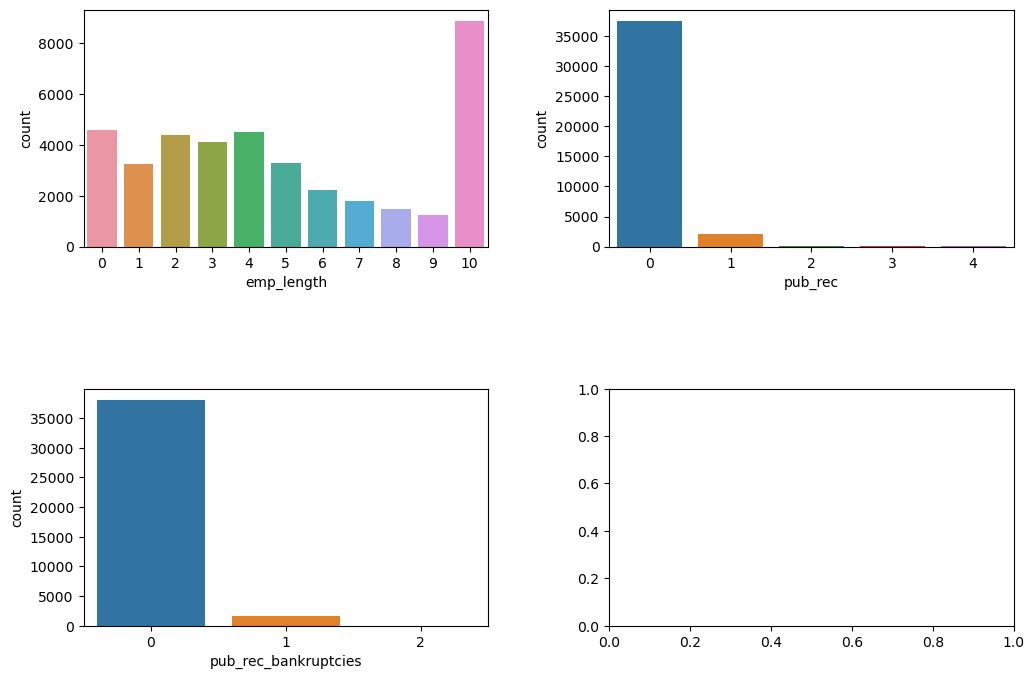

In [653]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, gridspec_kw={'hspace': 0.6, 'wspace': 0.3})
fig.set_size_inches(12,8)
sns.countplot(LCC, x='emp_length', ax=ax[0,0])
sns.countplot(LCC, x='pub_rec', ax=ax[0,1])
sns.countplot(LCC, x='pub_rec_bankruptcies', ax=ax[1,0])

<Axes: xlabel='emp_length', ylabel='count'>

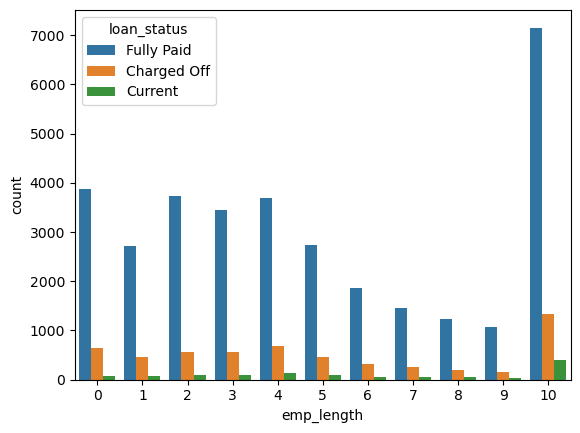

In [654]:
# Lets add Loan Status as segment
sns.countplot(LCC, x='emp_length', hue='loan_status')

In [359]:
prct = LCC.groupby('emp_length')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

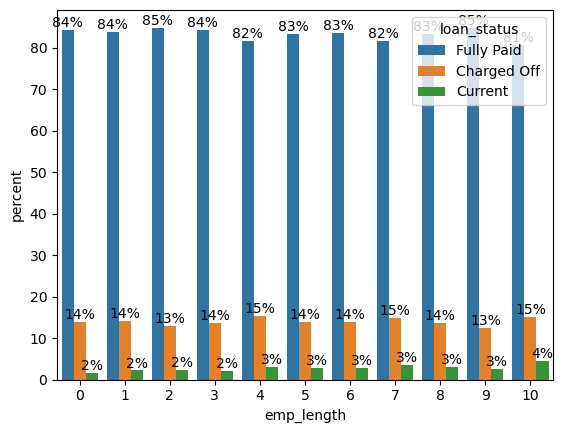

In [690]:
ax=sns.barplot(x='emp_length',y='percent',hue='loan_status',data=prct)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%')

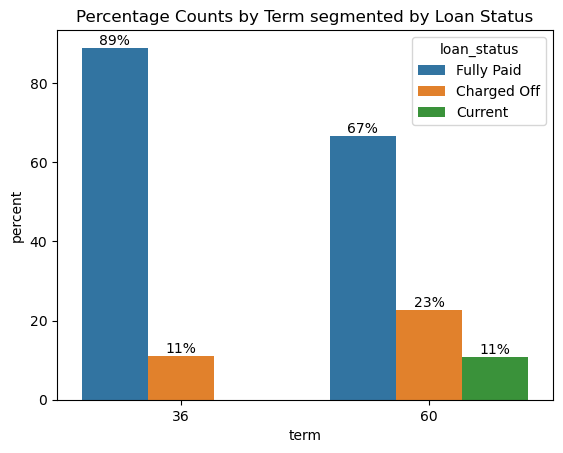

In [794]:
prct_term = LCC.groupby(by='term')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
ax=sns.barplot(x='term',y='percent',hue='loan_status',data=prct_term)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%')
ax.set_title("Percentage Counts by Term segmented by Loan Status")
plt.show()

- here we see that the emp_length does not really impact the loan charged off as the percentage of charge of is approximately in the same range across all emp_length
- though charged off loans with term of 36 are higher in numbers, the loans with term 60 months have higher percentage of charge off

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

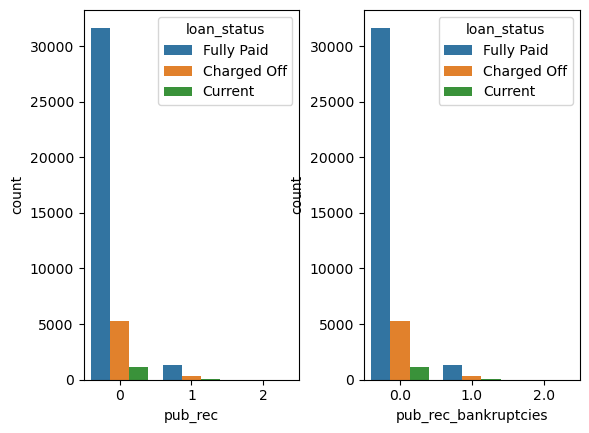

In [363]:
# Lets segment the pub_rec and pub_rec_bankruptcies by loan status
fig, ax = plt.subplots(ncols =2, gridspec_kw={'hspace': 0.6, 'wspace': 0.3})
sns.countplot(LCC, x='pub_rec', ax=ax[0], hue='loan_status')
sns.countplot(LCC, x='pub_rec_bankruptcies',ax=ax[1], hue='loan_status')

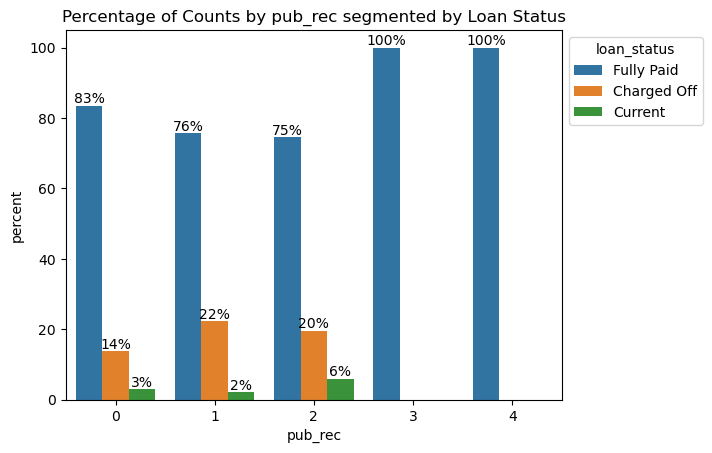

In [795]:
prct_pr = LCC.groupby('pub_rec')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
ax=sns.barplot(x='pub_rec',y='percent',hue='loan_status',data=prct_pr)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("Percentage of Counts by pub_rec segmented by Loan Status")
plt.show()

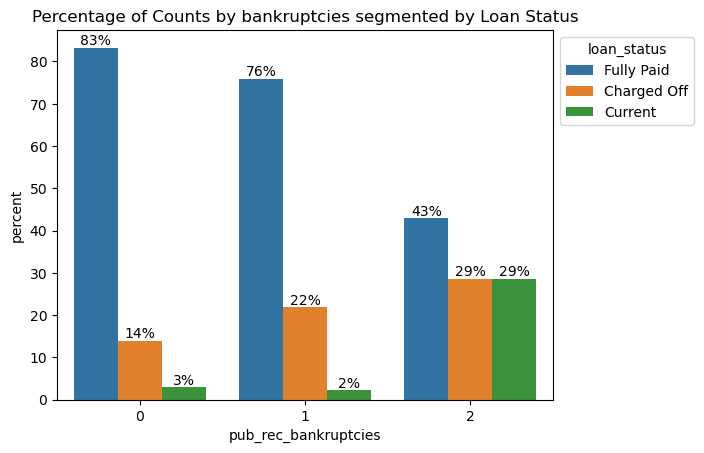

In [796]:
prct_prb = LCC.groupby('pub_rec_bankruptcies')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
ax=sns.barplot(x='pub_rec_bankruptcies',y='percent',hue='loan_status',data=prct_prb)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("Percentage of Counts by bankruptcies segmented by Loan Status")
plt.show()

## Inference 
### based on the percentage based catplots for pub_rec and pub_rec_bankruptcies 
- the percentage of charged off loans increases with the count of pub_rec
- the percentage of charged off loans increases with the count of pub_rec_bankruptcies

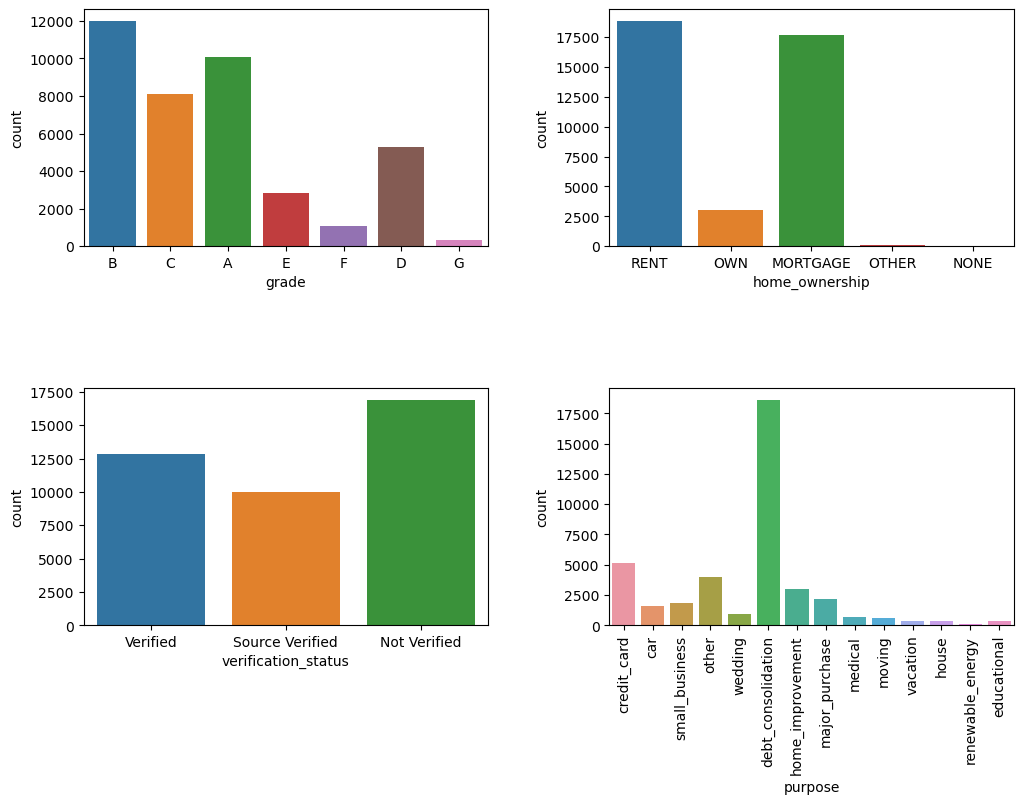

In [695]:
# Lets move to the other catgorical variables
# Lets consider grade, home_ownership, verification_status and purpose
fig, ax = plt.subplots(ncols = 2, nrows = 2, gridspec_kw={'hspace': 0.6, 'wspace': 0.3})
fig.set_size_inches(12,8)
sns.countplot(LCC, x='grade', ax=ax[0,0])
sns.countplot(LCC, x='home_ownership', ax=ax[0,1])
sns.countplot(LCC, x='verification_status', ax=ax[1,0])
sns.countplot(LCC, x='purpose', ax=ax[1,1])
for tick in ax[1,1].get_xticklabels():
    tick.set_rotation(90)
plt.show()

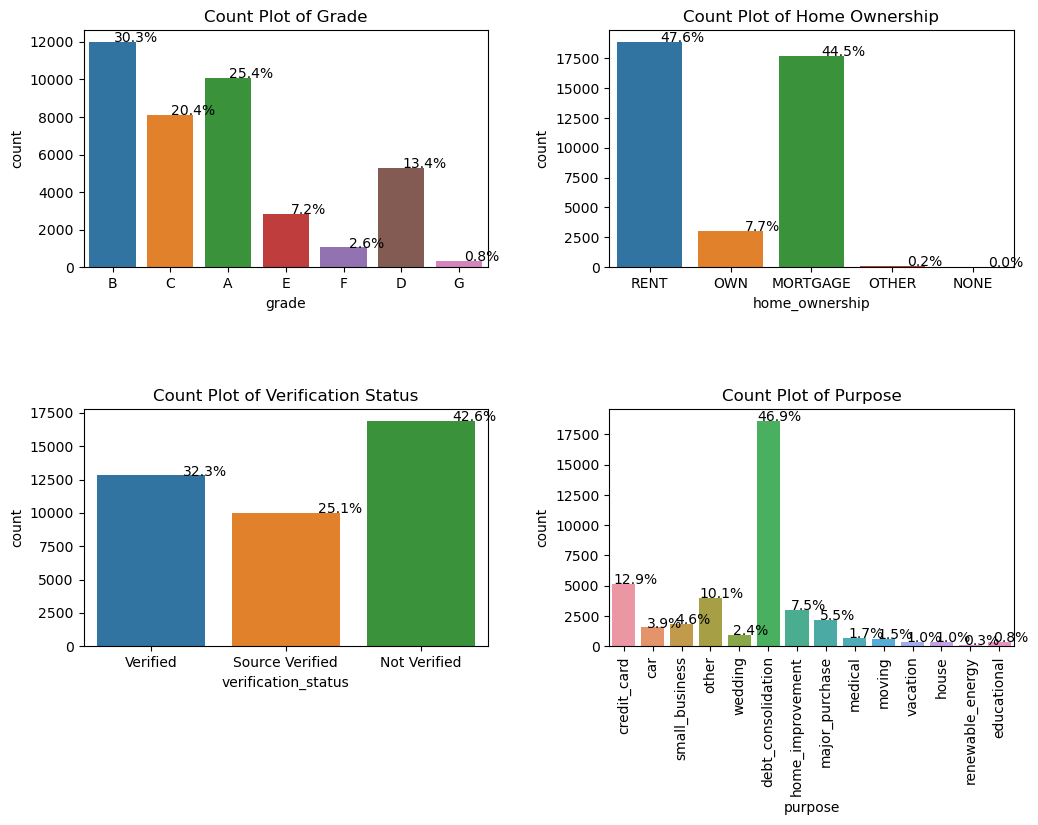

In [375]:
#Lets try to add percentages on these countplots
total = float(len(LCC))
def annot_percent(ax):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    
fig, ax = plt.subplots(ncols = 2, nrows = 2, gridspec_kw={'hspace': 0.6, 'wspace': 0.3})
fig.set_size_inches(12,8)
sns.countplot(LCC, x='grade', ax=ax[0,0]).set_title('Count Plot of Grade')
annot_percent(ax[0,0])
sns.countplot(LCC, x='home_ownership', ax=ax[0,1]).set_title('Count Plot of Home Ownership')
annot_percent(ax[0,1])
sns.countplot(LCC, x='verification_status', ax=ax[1,0]).set_title('Count Plot of Verification Status')
annot_percent(ax[1,0])
sns.countplot(LCC, x='purpose', ax=ax[1,1]).set_title('Count Plot of Purpose')
annot_percent(ax[1,1])
for tick in ax[1,1].get_xticklabels():
    tick.set_rotation(90)
plt.show()

# Inferences
- 75% of the loans are in grade A, B, C
- more than 92% of the loans are taken by persons with house ownership as rented or mortgaged
- Around 42% of accounts are not verified
- Around 67% of the loans are for three purposes - debt_consolidation, credit_card and home_improvement - with debt_consolidation covering more than 46% of total loans

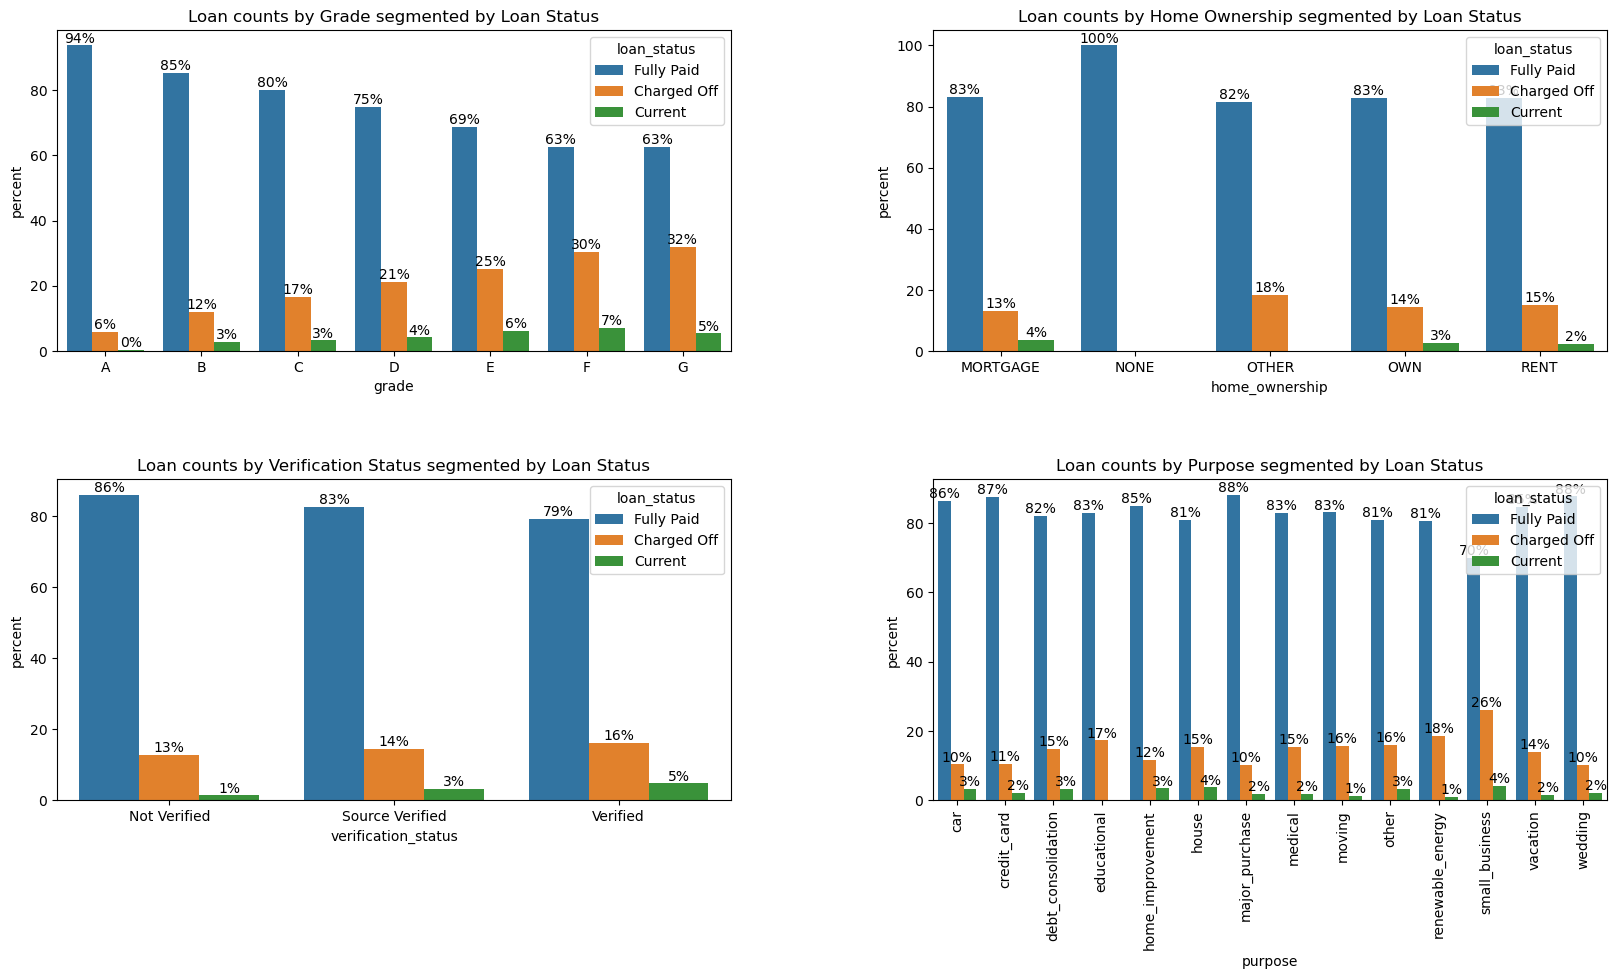

In [797]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, gridspec_kw={'hspace': 0.4, 'wspace': 0.3})
fig.set_size_inches(20,10)
prct_grade = LCC.groupby('grade')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
ax1=sns.barplot(x='grade',y='percent',hue='loan_status',ax=ax[0,0],data=prct_grade)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f%%')
ax1.set_title("Loan counts by Grade segmented by Loan Status")

prct_ho = LCC.groupby('home_ownership')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
ax1=sns.barplot(x='home_ownership',y='percent',hue='loan_status',ax=ax[0,1],data=prct_ho)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f%%')
ax1.set_title("Loan counts by Home Ownership segmented by Loan Status")


prct_vs = LCC.groupby('verification_status')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
ax1=sns.barplot(x='verification_status',y='percent',hue='loan_status',ax=ax[1,0],data=prct_vs)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f%%')
ax1.set_title("Loan counts by Verification Status segmented by Loan Status")

prct_pur = LCC.groupby('purpose')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
ax1=sns.barplot(x='purpose',y='percent',hue='loan_status',ax=ax[1,1],data=prct_pur)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f%%')
ax1.set_title("Loan counts by Purpose segmented by Loan Status")


for tick in ax[1,1].get_xticklabels():
    tick.set_rotation(90)
plt.show()

In [410]:
purpose_pivot = pd.pivot_table( index='loan_status', columns='purpose', values='id', aggfunc='count', data=LCC).apply(lambda x: round(x*100/sum(x),2))

In [412]:
purpose_pivot

purpose        car  credit_card  debt_consolidation  educational  \
loan_status                                                        
Charged Off  10.33        10.57               14.84          NaN   
Current       3.23         2.01                3.14          NaN   
Fully Paid   86.44        87.43               82.01          NaN   

purpose      home_improvement  house  major_purchase  medical  moving  other  \
loan_status                                                                    
Charged Off             11.66  15.49           10.15    15.30   15.78  15.85   
Current                  3.39   3.67            1.69     1.73    1.20   3.21   
Fully Paid              84.95  80.84           88.16    82.97   83.02  80.94   

purpose      renewable_energy  small_business  vacation  wedding  
loan_status                                                       
Charged Off             18.45           25.98     13.91    10.14  
Current                  0.97            4.05      1.57     2.22  
Fully Paid              80.58           69.97     84.51    87.65

In [414]:
pd.pivot_table( index='loan_status', columns='purpose', values='id', aggfunc='count', data=LCC)

purpose         car  credit_card  debt_consolidation  educational  \
loan_status                                                         
Charged Off   160.0        542.0              2767.0         56.0   
Current        50.0        103.0               586.0          NaN   
Fully Paid   1339.0       4485.0             15288.0        269.0   

purpose      home_improvement  house  major_purchase  medical  moving   other  \
loan_status                                                                     
Charged Off             347.0   59.0           222.0    106.0    92.0   633.0   
Current                 101.0   14.0            37.0     12.0     7.0   128.0   
Fully Paid             2528.0  308.0          1928.0    575.0   484.0  3232.0   

purpose      renewable_energy  small_business  vacation  wedding  
loan_status                                                       
Charged Off              19.0           475.0      53.0     96.0  
Current                   1.0            74.0       6.0     21.0  
Fully Paid               83.0          1279.0     322.0    830.0

In [416]:
# Lets check if there are more defaults in a certain addr_state
LCC_Charge_Off = LCC[LCC['loan_status'] == 'Charged Off']

In [445]:
x=LCC_Charge_Off.addr_state.value_counts(normalize=True,sort=False).mul(100) # mul(100) is == *100
x.index.name,x.name = 'addr_state','percentage_' #setting the name of index and series
dfx = x.to_frame()
dfx[dfx["percentage_"] > 3].sort_values(by='percentage_',ascending=False)

percentage_
addr_state             
CA            19.992891
FL             8.956815
NY             8.796872
TX             5.615781
NJ             4.940466
GA             3.820864
IL             3.500977
PA             3.198863
VA             3.145548

## Inferences
- The percentage of charged off loans increases with loan grade from A to G and at the same time % of fully paid loans decreases
- More than 25% of loans taken for small business get charged off, next higest percentage is that of renewable energy at more than 18%
- home ownership does not affect the loan charge off as seen from the percentages
- More than 50% of the charge offs are from the states of CA, FL, NY, TX, NJ and GA


## Derived Metrics

In [451]:
#Lets derive interest rate levels based on the interest rate range
LCC.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [453]:
#Lets define the levels as below
# Low - 0 to 6
# Medium - 6 to 12
# High - 12 to 18
# Very High - 18 or more
def get_range(x):
    if x < 6:
        return "Low"
    elif x >= 6 and x < 12:
        return "Medium"
    elif x >= 12 and x < 18:
        return "High"
    else:
        return "V High"

LCC["int_rate_level"] = LCC.int_rate.apply(lambda x: get_range(x))

In [464]:
# Lets get the issue_mth and issue_year from the issue_d
LCC["issue_mon"]=LCC.issue_d.apply(lambda x: x.split('-')[0])
LCC["issue_year"]=LCC.issue_d.apply(lambda x: '20' + x.split('-')[1])

In [466]:
LCC.issue_year.unique()

array(['2011', '2010', '2009', '2008', '2007'], dtype=object)

In [468]:
LCC.issue_mon.unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan'], dtype=object)

Text(0.5, 1.0, 'Count Plot of Year Segmented by Loan Status')

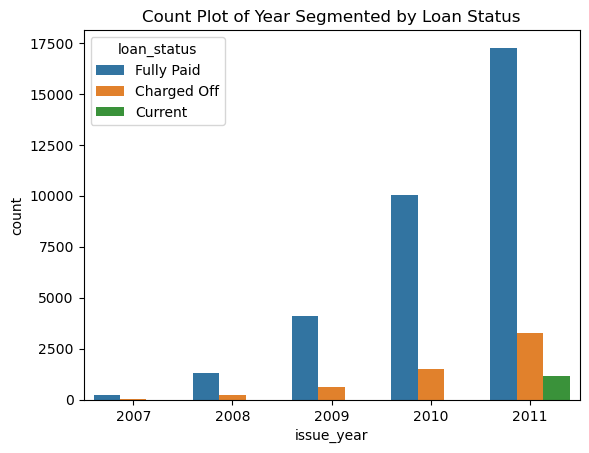

In [499]:
# Lets analyze the count per year segmented by loan status
yo = ['2007','2008','2009','2010','2011']
sns.countplot(LCC, x='issue_year', hue='loan_status', order=yo).set_title('Count Plot of Year Segmented by Loan Status')

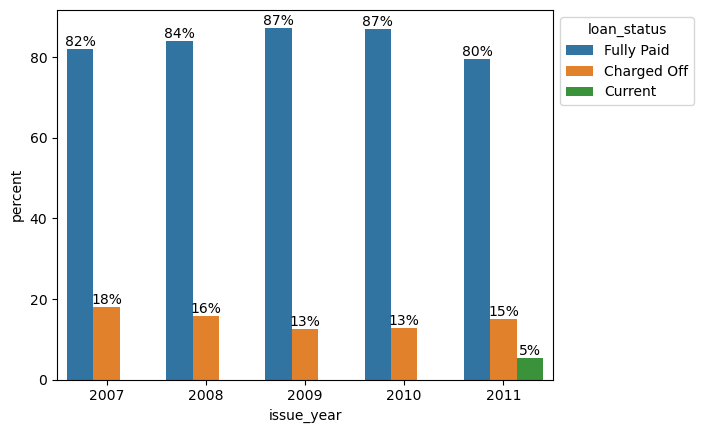

In [707]:
#As absolute numbers may not give a correct picture, lets analyze by percentage
prct_year = LCC.groupby('issue_year')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
ax=sns.barplot(x='issue_year',y='percent',hue='loan_status',data=prct_year)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Text(0.5, 1.0, 'Percentage of accounts per interest rate level segmented by loan status')

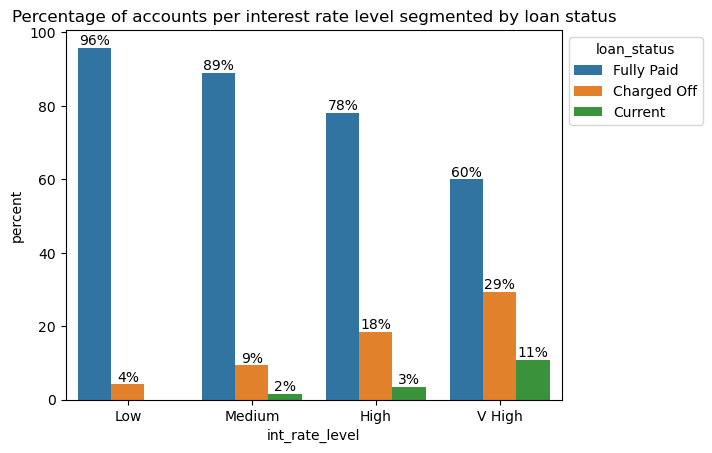

In [798]:
# Lets analyze by interest rate level 
prct_irl = LCC.groupby('int_rate_level')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
ax=sns.barplot(x='int_rate_level',y='percent',hue='loan_status',data=prct_irl, order=['Low','Medium','High','V High'])
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("Percentage of accounts per interest rate level segmented by loan status")

In [481]:
# On similar lines lets create bins for loan amount also
LCC.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [800]:
LCC["loan_amnt_category"] = pd.cut(LCC.loan_amnt, bins=5,labels=['V Low','Low','Medium','High','V High'])

In [804]:
out,bins = pd.cut(LCC.loan_amnt, bins=5,labels=['V Low','Low','Medium','High','V High'], retbins=True)

In [805]:
print(bins)

[  465.5  7400.  14300.  21200.  28100.  35000. ]


Text(0.5, 1.0, 'Percentage of accounts per loan amount category segmented by loan status')

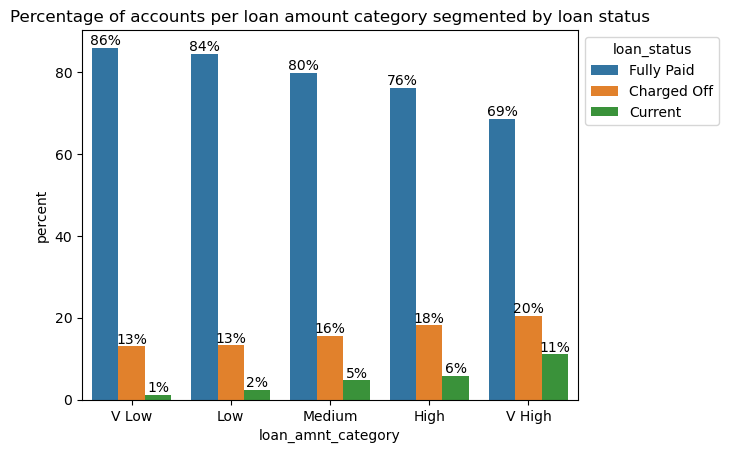

In [799]:
# Lets plot the barplot for Loan amount category segmented by Loan Status using percentages
prct_amnt = LCC.groupby('loan_amnt_category')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
ax=sns.barplot(x='loan_amnt_category',y='percent',hue='loan_status',data=prct_amnt, order=['V Low','Low','Medium','High','V High'])
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("Percentage of accounts per loan amount category segmented by loan status")

In [757]:
#Lets create bins for the number of open_acc
LCC["open_acc_category"] = pd.cut(LCC.open_acc, bins=5,labels=['V Low','Low','Medium','High','V High'])

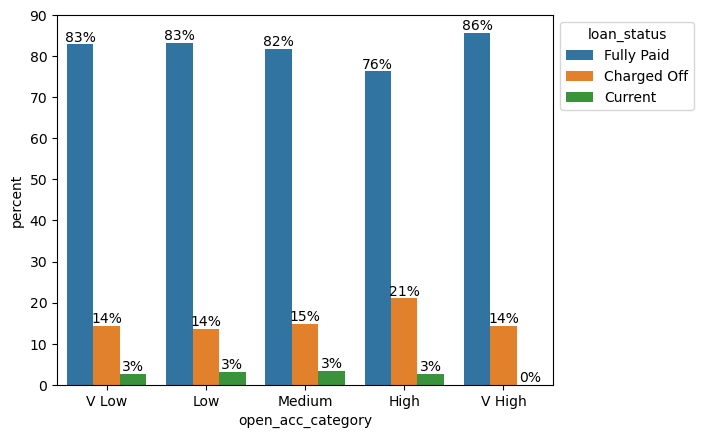

In [760]:
# Lets plot the barplot for Loan amount category segmented by Loan Status using percentages
prct_oa = LCC.groupby('open_acc_category')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
ax=sns.barplot(x='open_acc_category',y='percent',hue='loan_status',data=prct_oa, order=['V Low','Low','Medium','High','V High'])
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

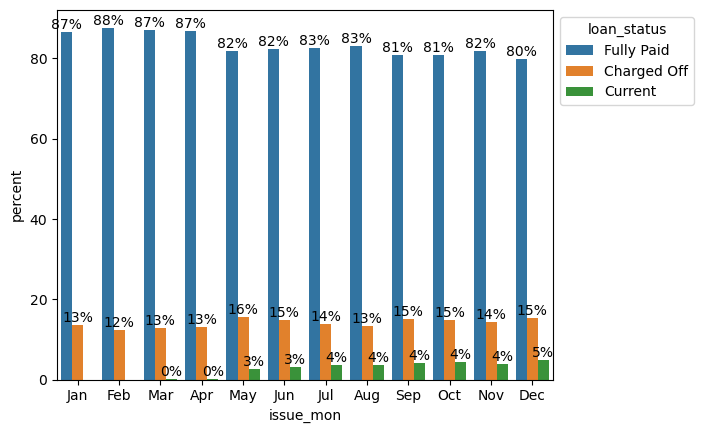

In [710]:
# Lets plot the countplot by months segmented by loan status using percentage
month_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
prct_mon = LCC.groupby('issue_mon')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
ax=sns.barplot(x='issue_mon',y='percent',hue='loan_status',data=prct_mon,order=month_order)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [566]:
# Lets do a binning for the annual income
print(LCC.annual_inc.quantile(0.15))
print(LCC.annual_inc.quantile(0.35))
print(LCC.annual_inc.quantile(0.55))
print(LCC.annual_inc.quantile(0.8))
print(LCC.annual_inc.quantile(0.98))

34000.0
48000.0
62000.0
90000.0
187000.0


In [567]:
LCC.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [711]:
#Cutting in bins based on the quantile and max values
LCC["annual_inc_category"] = pd.cut(LCC.annual_inc, bins=[0,34000,48000,62000,90000,187000,6000000],labels=['V Low','Low','Mid-Low','Mid-High','High','V High'])

Text(0.5, 1.0, 'Percentage of accounts per annual income category segmented by loan status')

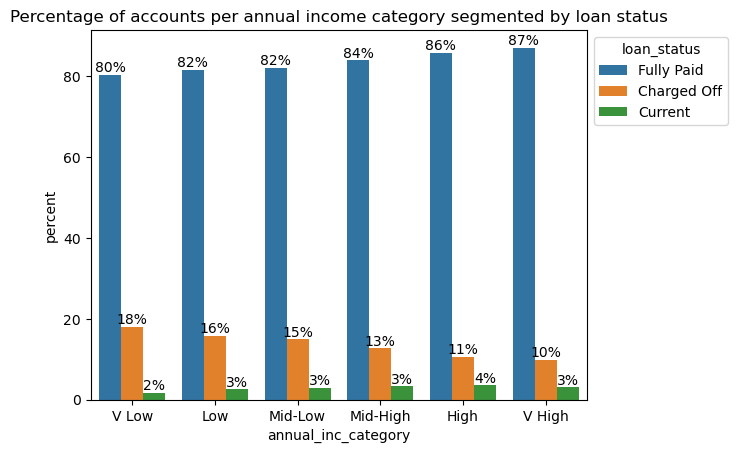

In [806]:
# Plot a barplot of annual_inc_category segmented by loan status by percentage
prct_inc = LCC.groupby('annual_inc_category')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
ax=sns.barplot(x='annual_inc_category',y='percent',hue='loan_status',data=prct_inc, order=['V Low','Low','Mid-Low','Mid-High','High','V High'])
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("Percentage of accounts per annual income category segmented by loan status")

In [713]:
# Lets derive a variable that indicates what % is the loan amount of annual income
LCC['loan_amnt_pct'] = round((LCC['loan_amnt'] / LCC["annual_inc"]) * 100,2)

In [714]:
# Lets bin the loan_amnt_pct 
LCC['loan_amnt_pct_level'] = pd.cut(LCC.loan_amnt_pct, bins=4)

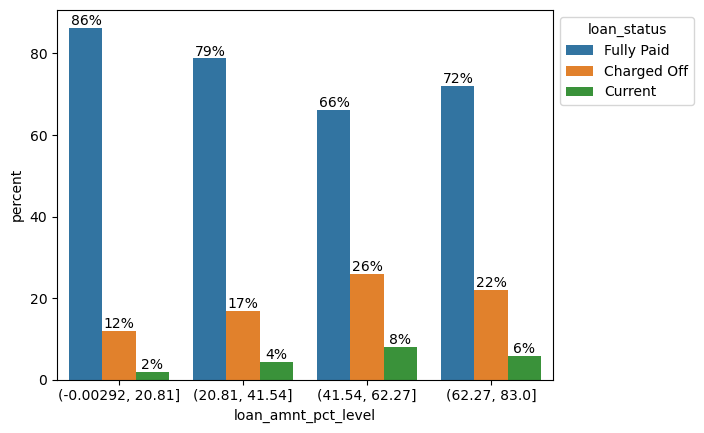

In [715]:
# Plot a barplot of loan_amnt_pct_level segmented by loan status by percentage
prct_pctl = LCC.groupby('loan_amnt_pct_level')['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
ax=sns.barplot(x='loan_amnt_pct_level',y='percent',hue='loan_status',data=prct_pctl)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Insights from derived metrics
- While the count of charged off loans has increased steadily from 2007 to 2011, the percentages show a declining trend till 2010
- Accounts with higher interest rates have higher percentage of charged off loans
- Accounts with higher loan amount have higher percentage of charged off loans
- The percentage of charged off loans is higher in case of individuals with low annual income
- If the loan amount is a smaller percentage of individuals annual income then the percentage of charged off accounts is less

## Bivariate analysis

In [575]:
print(LCC.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'int_rate_level',
       'issue_mon', 'issue_year', 'loan_amnt_category', 'annual_inc_category',
       'loan_amnt_pct', 'loan_amnt_pct_level'],
      dtype='object')


<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

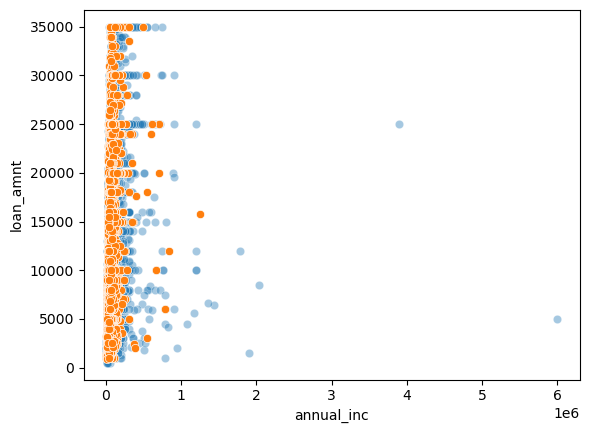

In [716]:
ax = sns.scatterplot(data=LCC[LCC['loan_status'] != 'Charged Off'], x='annual_inc', y='loan_amnt', alpha=0.4)
sns.scatterplot(data=LCC[LCC['loan_status'] == 'Charged Off'], x='annual_inc', y='loan_amnt', alpha=1.0, ax=ax)

<Axes: xlabel='annual_inc', ylabel='int_rate'>

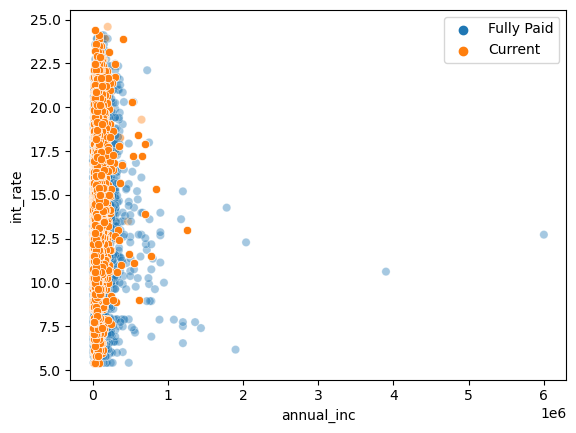

In [718]:
ax = sns.scatterplot(data=LCC[LCC['loan_status'] != 'Charged Off'], x='annual_inc', y='int_rate',hue='loan_status', alpha=0.4)
sns.scatterplot(data=LCC[LCC['loan_status'] == 'Charged Off'], x='annual_inc', y='int_rate', alpha=1.0, ax=ax)

Text(0.5, 1.0, 'Loan Amount vs Interest Rate segmented by Loan Status')

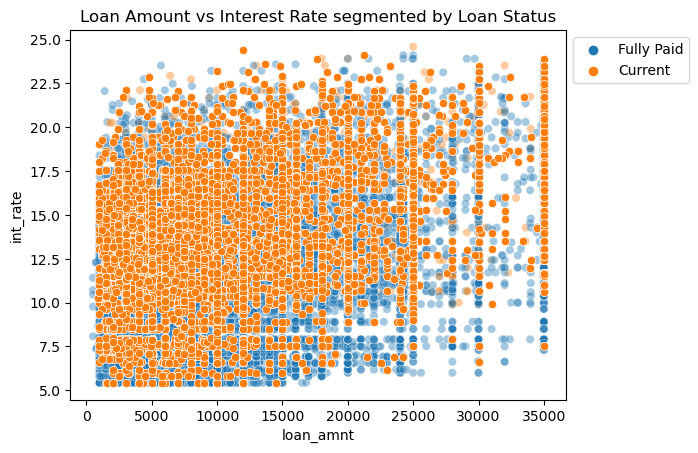

In [807]:
ax = sns.scatterplot(data=LCC[LCC['loan_status'] != 'Charged Off'], x='loan_amnt', y='int_rate',hue='loan_status', alpha=0.4)
sns.scatterplot(data=LCC[LCC['loan_status'] == 'Charged Off'], x='loan_amnt', y='int_rate', alpha=1.0, ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("Loan Amount vs Interest Rate segmented by Loan Status")

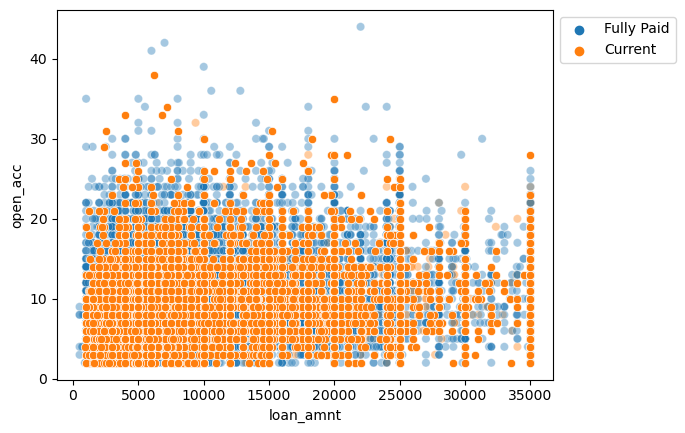

In [752]:
ax = sns.scatterplot(data=LCC[LCC['loan_status'] != 'Charged Off'], x='loan_amnt', y='open_acc',hue='loan_status', alpha=0.4)
sns.scatterplot(data=LCC[LCC['loan_status'] == 'Charged Off'], x='loan_amnt', y='open_acc', alpha=1.0, ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

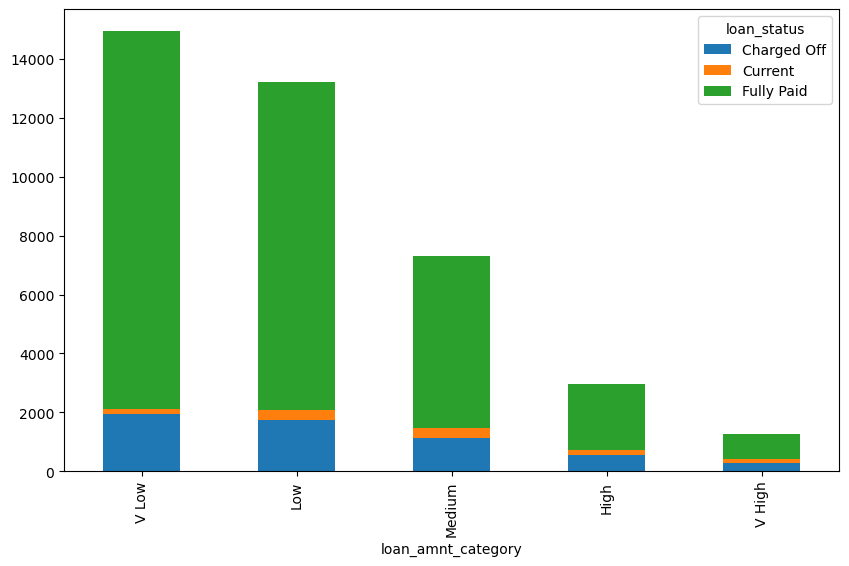

In [503]:
loan_stats.plot(kind='bar', stacked=True, figsize=[10,6])
plt.show()

## Insights from Bivariate analysis
- loans for individuals with low annual income and interest rates between 10 to 20% have a higher concentration of charge offs
- loans of amount up to 15000 and interest rate between 10 to 17.5% have higher concentration of charge offs

## Multivariate Analysis

In [589]:
LCC.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'int_rate_level',
       'issue_mon', 'issue_year', 'loan_amnt_category', 'annual_inc_category',
       'loan_amnt_pct', 'loan_amnt_pct_level'],
      dtype='object')

In [594]:
LCC_Select= LCC[['loan_amnt','int_rate','installment','emp_length','annual_inc','inq_last_6mths','pub_rec','out_prncp_inv','pub_rec_bankruptcies','open_acc']]

In [595]:
LCC_Select.corr()

loan_amnt  int_rate  installment  emp_length  \
loan_amnt              1.000000  0.309415     0.930288    0.155524   
int_rate               0.309415  1.000000     0.282703    0.008828   
installment            0.930288  0.282703     1.000000    0.126819   
emp_length             0.155524  0.008828     0.126819    1.000000   
annual_inc             0.271149  0.053185     0.270874    0.113388   
inq_last_6mths         0.009229  0.133013     0.009722    0.007760   
pub_rec               -0.036284  0.083579    -0.033746    0.056892   
out_prncp_inv          0.192623  0.134668     0.124932    0.052512   
pub_rec_bankruptcies  -0.036284  0.083579    -0.033746    0.056892   
open_acc               0.177168  0.010395     0.172812    0.097407   

                      annual_inc  inq_last_6mths   pub_rec  out_prncp_inv  \
loan_amnt               0.271149        0.009229 -0.036284       0.192623   
int_rate                0.053185        0.133013  0.083579       0.134668   
installment             0.270874        0.009722 -0.033746       0.124932   
emp_length              0.113388        0.007760  0.056892       0.052512   
annual_inc              1.000000        0.033908 -0.016514       0.033472   
inq_last_6mths          0.033908        1.000000  0.015652      -0.011780   
pub_rec                -0.016514        0.015652  1.000000      -0.009797   
out_prncp_inv           0.033472       -0.011780 -0.009797       1.000000   
pub_rec_bankruptcies   -0.016514        0.015652  1.000000      -0.009797   
open_acc                0.158200        0.091713  0.005763       0.028514   

                      pub_rec_bankruptcies  open_acc  
loan_amnt                        -0.036284  0.177168  
int_rate                          0.083579  0.010395  
installment                      -0.033746  0.172812  
emp_length                        0.056892  0.097407  
annual_inc                       -0.016514  0.158200  
inq_last_6mths                    0.015652  0.091713  
pub_rec                           1.000000  0.005763  
out_prncp_inv                    -0.009797  0.028514  
pub_rec_bankruptcies              1.000000  0.005763  
open_acc                          0.005763  1.000000

- based on above, loan_amnt and installment have a strong correlation which is obvious
- apart from this however we do not see much correlation on the numerical values in our data set

In [605]:
pivot2 = pd.pivot_table(data=LCC, index="loan_amnt_category", columns="loan_status", values="int_rate", aggfunc='mean')

<Axes: xlabel='loan_status', ylabel='loan_amnt_category'>

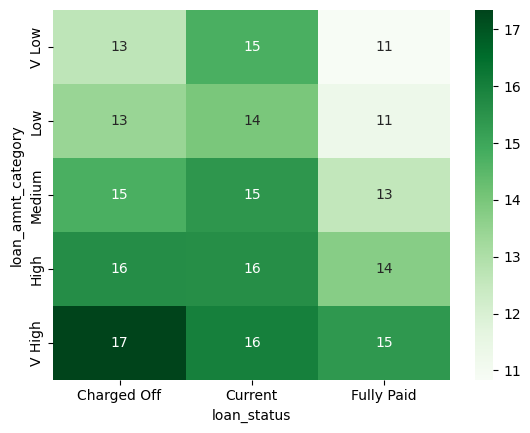

In [606]:
sns.heatmap(pivot2, cmap='Greens', annot=True)

- based on the above we see that loans with high amount and getting charged off have a higher mean interest rate

In [731]:
LCC.groupby(by=['annual_inc_category','loan_status']).id.count()

annual_inc_category  loan_status
V Low                Charged Off    1081
                     Current         101
                     Fully Paid     4832
Low                  Charged Off    1310
                     Current         213
                     Fully Paid     6749
Mid-Low              Charged Off    1165
                     Current         228
                     Fully Paid     6405
Mid-High             Charged Off    1253
                     Current         328
                     Fully Paid     8297
High                 Charged Off     740
                     Current         246
                     Fully Paid     5975
V High               Charged Off      78
                     Current          24
                     Fully Paid      692
Name: id, dtype: int64

- we see that maximum concentration of the charged off loans is up to the annual_inc_category of Mid-High

In [812]:
pivot_inc1 = pd.pivot_table(data=LCC, index="annual_inc_category", columns="loan_status", values="id", aggfunc='count').apply(lambda x: round((x/x.sum())*100,2), axis=0)

Text(0.5, 1.0, 'Percentage of loans relative to Annual Income Category & Loan Status')

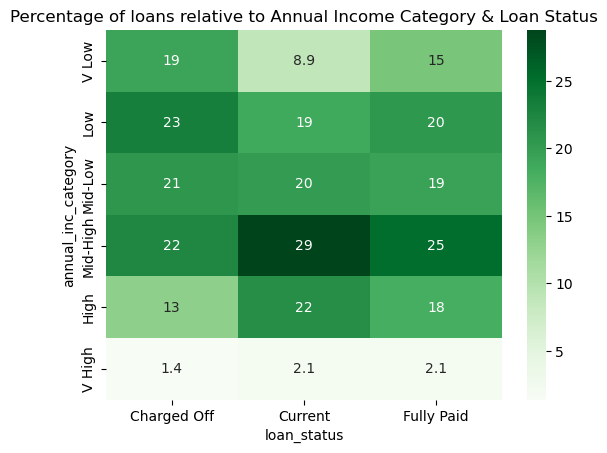

In [813]:
sns.heatmap(pivot_inc1, cmap='Greens', annot=True).set_title("Percentage of loans relative to Annual Income Category & Loan Status")

In [808]:
pivot_inc2 = pd.pivot_table(data=LCC, index="annual_inc_category", columns="loan_status", values="id", aggfunc='count').apply(lambda x: round((x/x.sum())*100,2), axis=1)

Text(0.5, 1.0, 'Percentage of loans relative to Annual Income Category & Loan Status')

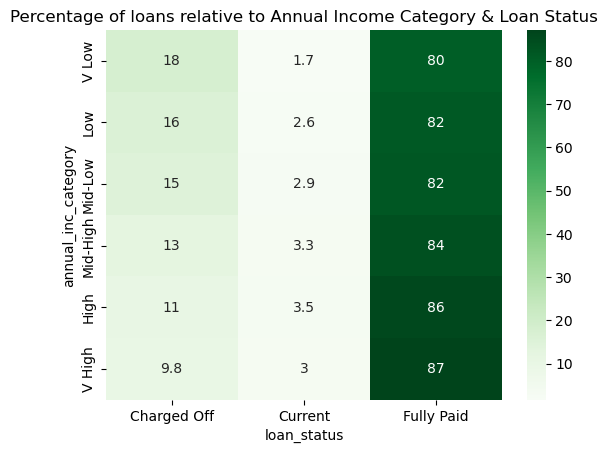

In [810]:
sns.heatmap(pivot_inc2, cmap='Greens', annot=True).set_title("Percentage of loans relative to Annual Income Category & Loan Status")

## Insights
- what we see from the first heat map is that within the charged off loans the "V Low" to "Mid High" income categories have a higher percentage of charged off loans
- as per the second heatmap across all the income categories "V Low" category seems to have highest percentage of charged off loans in comparison to other categories

In [814]:
pivot3 = pd.pivot_table(data=LCC, index="grade", columns="loan_status", values="id", aggfunc='count').apply(lambda x: round((x/x.sum())*100,2), axis=0)

Text(0.5, 1.0, 'Percentage of loans relative to Grade & Loan Status')

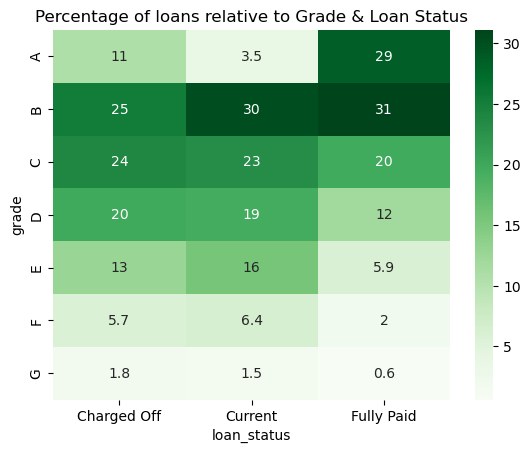

In [816]:
sns.heatmap(pivot3, cmap='Greens', annot=True).set_title("Percentage of loans relative to Grade & Loan Status")

Text(0.5, 1.0, 'Percentage of loans relative to Grade & Loan Status')

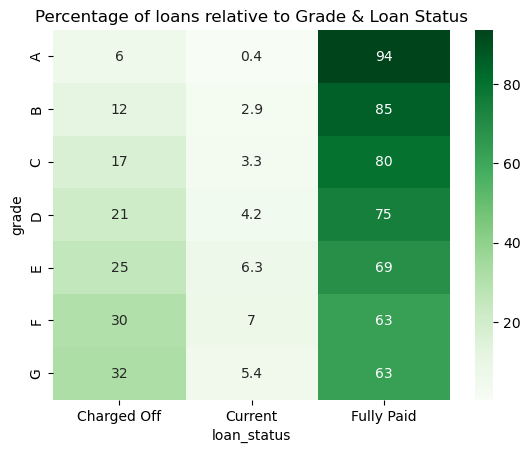

In [817]:
pivot4 = pd.pivot_table(data=LCC, index="grade", columns="loan_status", values="id", aggfunc='count').apply(lambda x: round((x/x.sum())*100,2), axis=1)
sns.heatmap(pivot4, cmap='Greens', annot=True).set_title("Percentage of loans relative to Grade & Loan Status")

- here we see that out of the total charged of loans a high percentage of the charged off loans are in grades B-D. However, within the grades, out of the loans issued per loan grade the percentage of charge off increases from grade A to G

In [743]:
pd.pivot_table(data=LCC, index="pub_rec", columns="loan_status", values="id", aggfunc='count')#.apply(lambda x: x/x.sum(), axis=1)

loan_status  Charged Off  Current  Fully Paid
pub_rec                                      
0                 5160.0   1094.0     31347.0
1                  457.0     43.0      1556.0
2                   10.0      3.0        38.0
3                    NaN      NaN         7.0
4                    NaN      NaN         2.0

In [744]:
LCC.pub_rec.unique()

array([0, 1, 2, 3, 4])

In [745]:
pivot_pr1 = pd.pivot_table(data=LCC, index="pub_rec", columns="loan_status", values="id", aggfunc='count').apply(lambda x: x/x.sum(), axis=1)

<Axes: xlabel='loan_status', ylabel='pub_rec'>

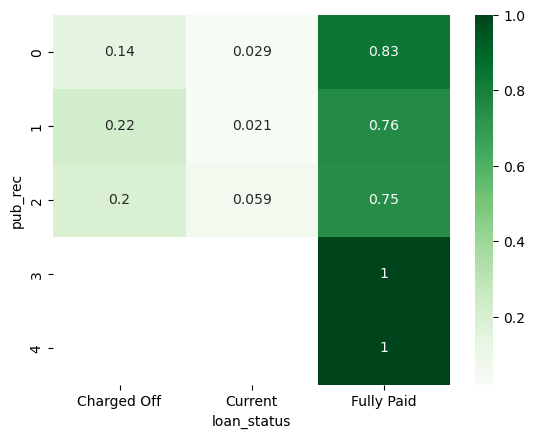

In [746]:
sns.heatmap(pivot_pr1, cmap='Greens', annot=True)

- we see that those accounts with 1 or 2 derogatory public records have a higher percentage of charged off accounts

In [747]:
pivot_pr2 = pd.pivot_table(data=LCC, index="pub_rec_bankruptcies", columns="loan_status", values="id", aggfunc='count').apply(lambda x: x/x.sum(), axis=1)

<Axes: xlabel='loan_status', ylabel='pub_rec_bankruptcies'>

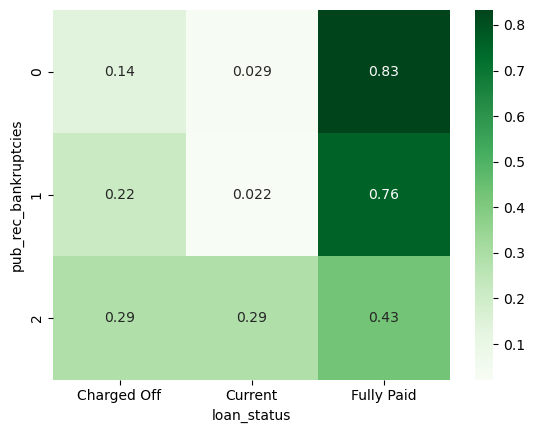

In [748]:
sns.heatmap(pivot_pr2, cmap='Greens', annot=True)

- we see that those accounts with 1 or 2 publicly recorded bankruptcies have a higher probability of being charged off 

In [773]:
LCC.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'int_rate_level',
       'issue_mon', 'issue_year', 'loan_amnt_category', 'annual_inc_category',
       'loan_amnt_pct', 'loan_amnt_pct_level', 'open_acc_category'],
      dtype='object')

In [778]:
LCC.loan_amnt_pct

0        20.83
1         8.33
2        19.59
3        20.33
4         3.75
         ...  
39712     2.27
39713    47.22
39714     5.00
39715     2.50
39716    34.09
Name: loan_amnt_pct, Length: 39717, dtype: float64

In [780]:
LCC_Select = LCC[['loan_amnt','term','int_rate','installment','emp_length','annual_inc','dti','pub_rec','loan_status']]

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


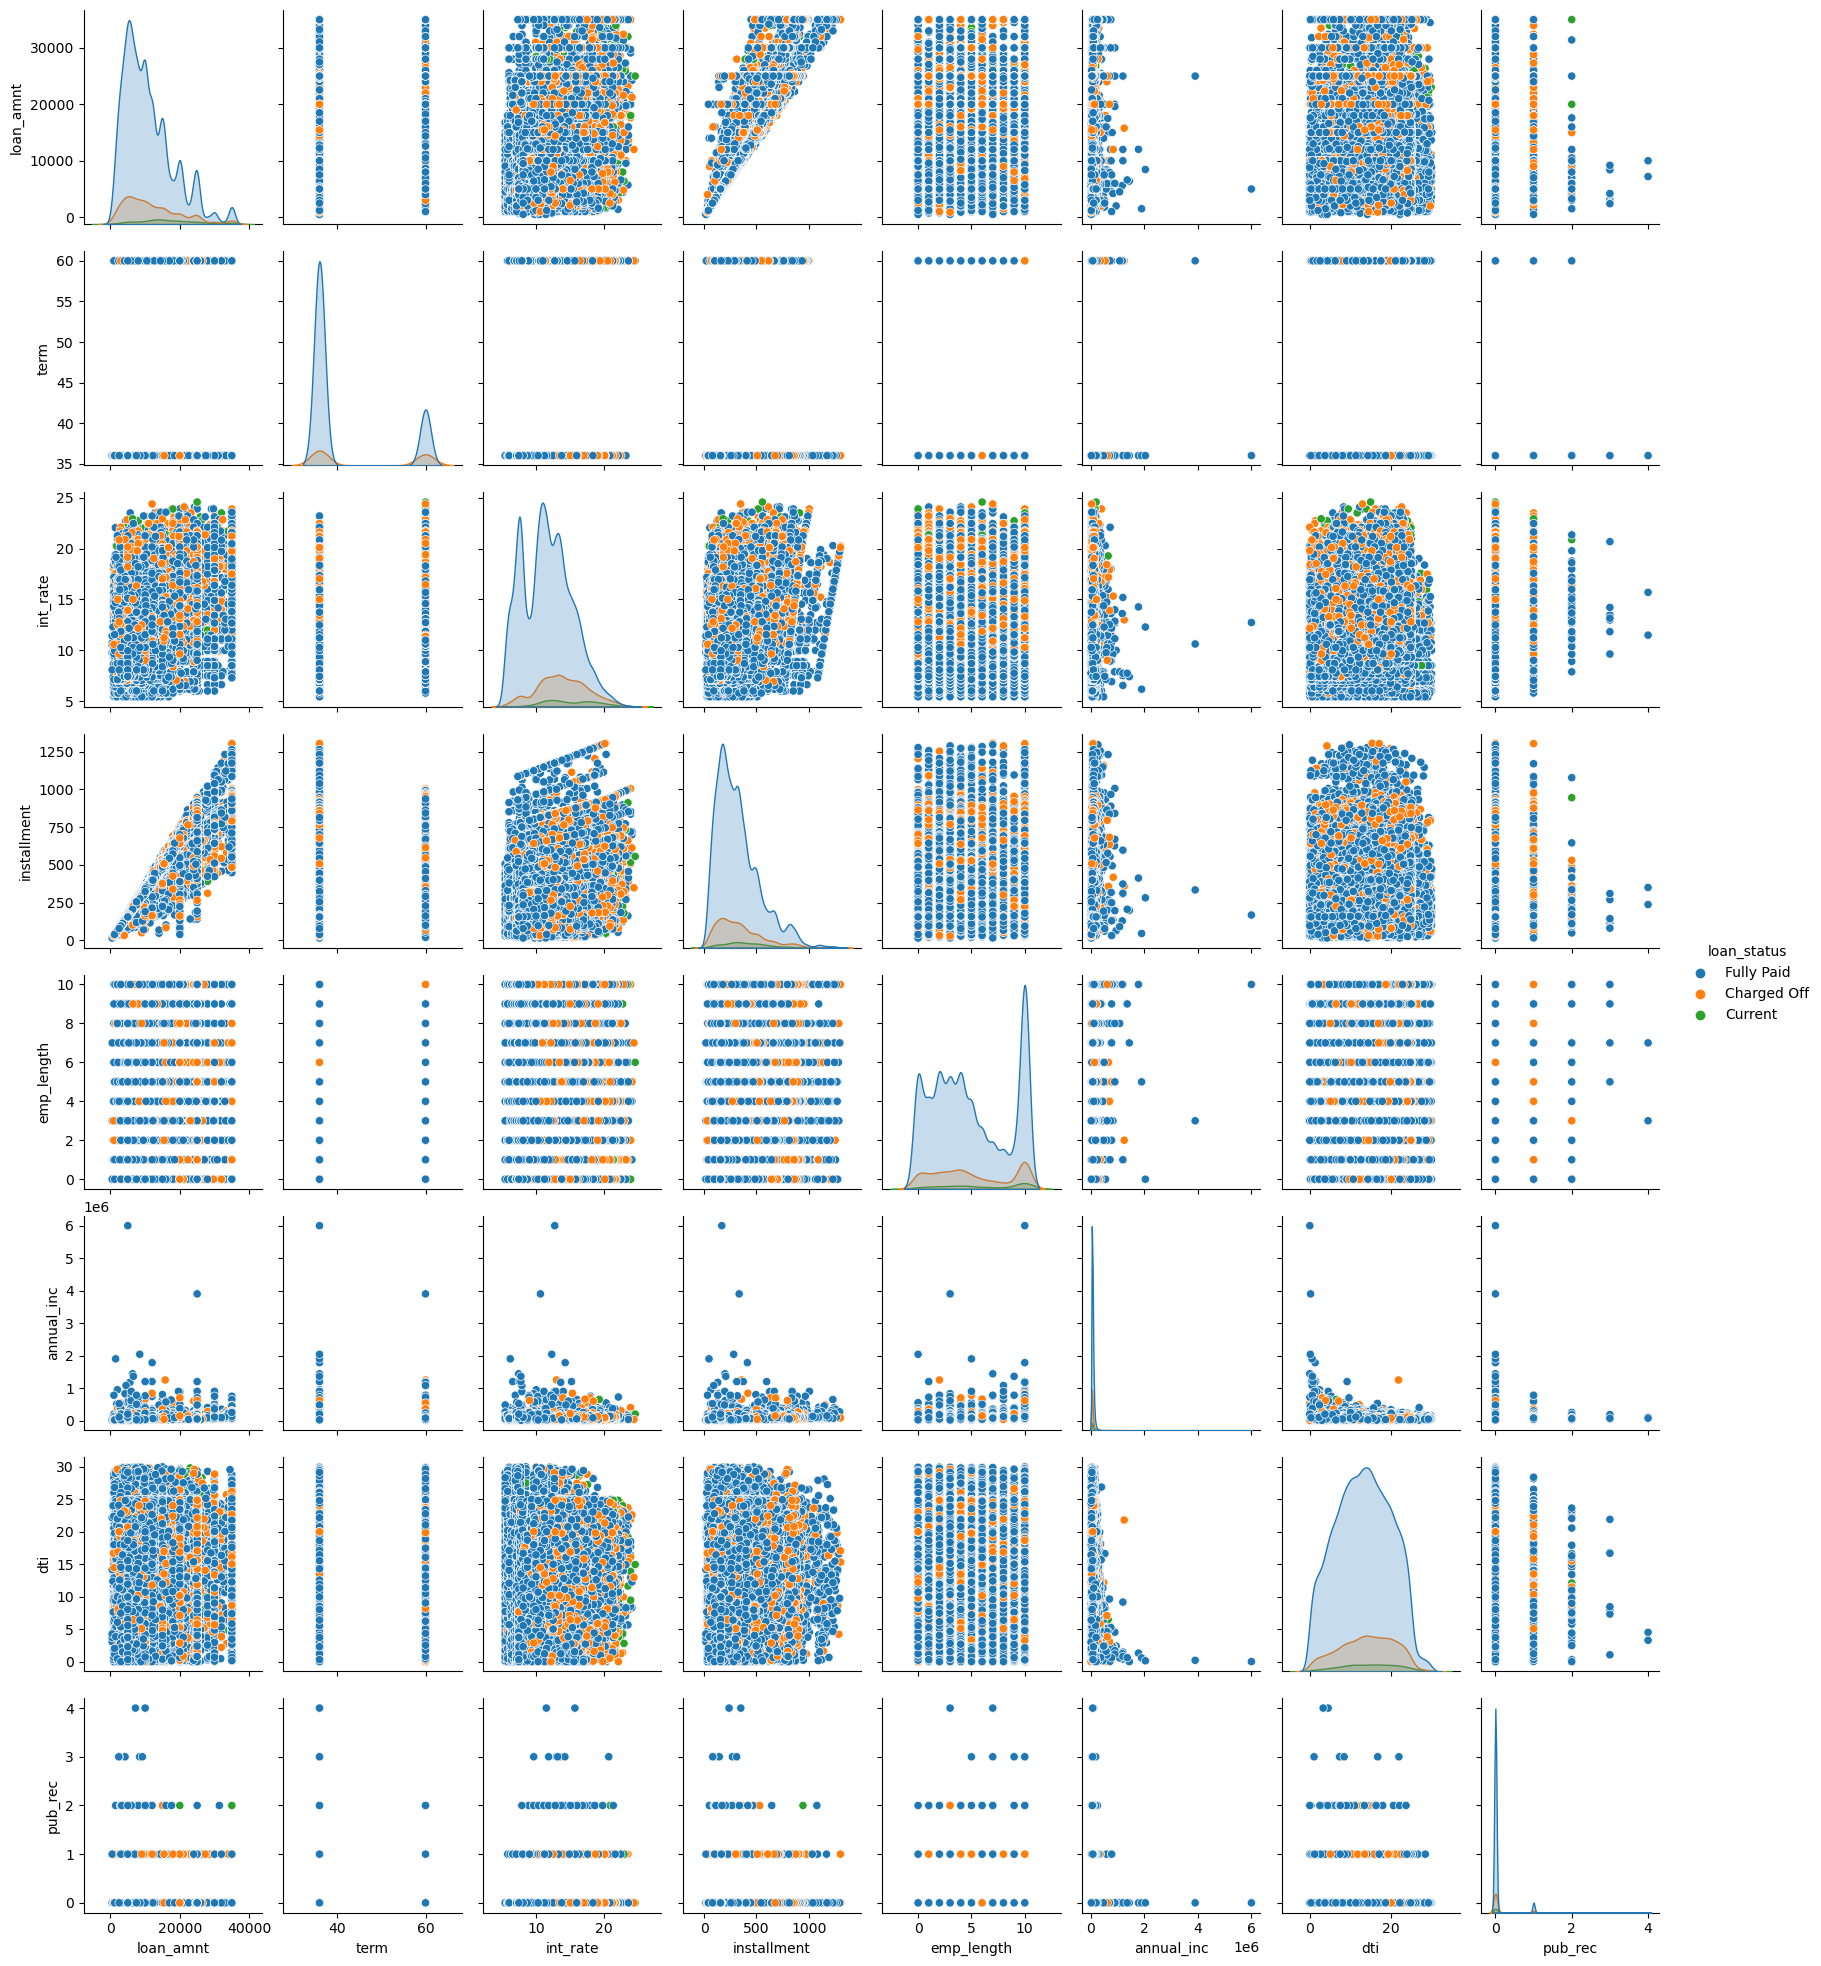

In [776]:
sns.pairplot(
    data=LCC_Select, 
    aspect=.85,
    hue='loan_status');

In [783]:
# Some variables like emp_length, pub_rec do not show much impact, while annual_inc is too skewed on lower side
#... lets revise the column list to have impactful variables
LCC_Select = LCC[['loan_amnt','loan_amnt_pct','int_rate','installment','dti','loan_status']]

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


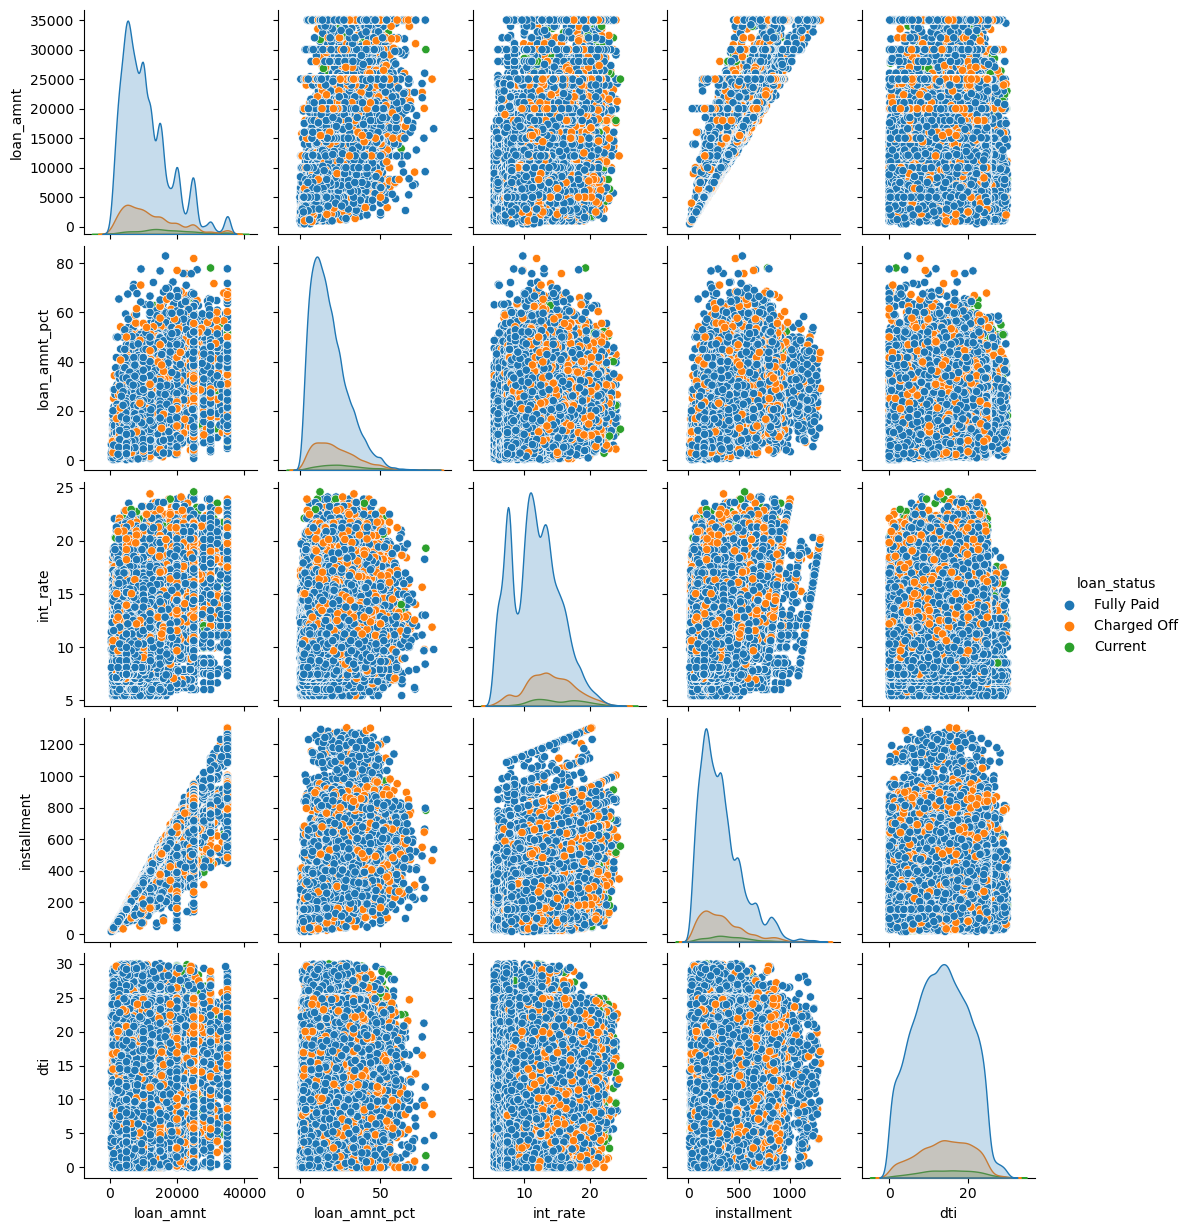

In [784]:
sns.pairplot(
    data=LCC_Select, 
    aspect=.85,
    hue='loan_status');

# Insights drawn from above plots
- Loan amount and installments have a direct correlation as expected 
- There is a cluster of charged off loans in the region of low to mid loan amounts and high interest rates
- If we observe the charge off peaks in the historams, the peaks are at - lower range of loan amount, mid range of interest rates and towards higher DTI
- Low DTI but mid to high interest rate also shows a cluster of charged off loans
- Higher loan amount percentage and mid to high interest rate also shows a cluster of charged off loans